# House Price Prediction With ML

#### Team Precision 
* Sunil
* Samuel 
* Sanjay
* Preneeth

<b>Source Code:</b> https://github.com/preneetho/ML/tree/master/Capstone%20Project

## Problem Statement

Building a tool to Predict the selling price of a house in given area by considering the parameters like Location, latitude & longitude, no. of bedrooms, bathrooms, no. of floors, area of house in sqft, condition of house, furnished or non-furnished, basement…etc. We have around 100 years of past data (21K records) to build the tool. The tool should leaverage machine learning to build a regression model to predict the right price. 

<img src="https://github.com/preneetho/ML/blob/master/Capstone%20Project/House1.jpg?raw=true">

## 1. Understanding Client & their Problems

#### 1.1. Current Situation

In the current market for home buyers and sellers there is no tool available to estimate the price of a house. Home buyers & sellers end up with long negotiations before finalizing the prices. The reason for it is there is no benchmark for house price. Buyers tries to reduce the price unreasonably without understanding current market price. Sellers quote exorbitant prices without considering the true value of the property. The prices of houses are decided by word of mouth and there is no scientific approach to decide on the price by considering all the factors like location, size, age etc.

#### 1.2. Opportunity for improvement

To overcome the above problem, there should be benchmark for the house prices by considering all external factors which decide the price of the house. We need to have tool like KBB (Kelley Blue Book) in US to get a best price for cars. A similar tool needs to be implemented for House Pricing. It would help both buyer and seller.

#### 1.3. Data Requirement

To build such tool, we would require past house transaction data with all details like area of house, type of house, rooms, location, age, price and many more attributes of the house. The attributes of house will help in deciding the right price for the house.

#### 1.4. Source of data and challenges

The data needs to be collected from various sources. The house transactions details can be obtained from District Registar office. It will contain the most of the house details + price. We would also need details about the locality, like schools, offices, railway stations, bus stations. These details can be obtained from Muncipal corporations. Getting all the details from various sources would be a big challenge, as the data might not be in required electronic format. Good amount of ground work need to be done to collate the data from different source systems and consolidate it for further processing.

#### 1.5. Size of the data

We would require atleast 5 years of data from multiple locations. The data should have pricing for various sizes of houses, types of house and location of houses. The effectiveness of the tool will depend of the quality and quantity of the past data. 

## 2. Understand the Data

### 2.1. Import necessary Libraries

In [715]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

#import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import r2_score
import seaborn as sn

from sklearn import svm
from scipy.stats import zscore

from scipy import stats
#from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from scipy.stats import spearmanr, pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
%matplotlib inline
sn.set(color_codes = True)
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

### 2.2. Load the Data

In [716]:
dataSet = pd.read_csv('../data/innercity.csv')
dataSet.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [717]:
dataSet.shape

(21613, 23)

In [718]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

<b>Findings:</b>
    * There are 21613 rows and 23 columns
    * All are numeric data except for dayhours
    * Looks like there are no null values. We need to explore further to confirm it.

In [719]:
#Finding unique values each column.

print ("Bed Rooms : ")
print (*list(dataSet.room_bed.unique()))

print ("Bath Rooms : ")
print (*list(dataSet.room_bath.unique()))

print ("Ceil : ")
print (*list(dataSet.ceil.unique()))

print ("Coast : ")
print (*list(dataSet.coast.unique()))

print ("Sight : ")
print (*list(dataSet.sight.unique()))

print ("Condition : ")
print (*list(dataSet.condition.unique()))

print ("Quality : ")
print (*list(dataSet.quality.unique()))

print ("Built Year : ")
years = dataSet.yr_built.copy()
years = years.sort_values()
print (*list(years.unique()))

print ("Renovated Year : ")
years = dataSet.yr_renovated.copy()
years = years.sort_values()
print (*list(years.unique()))

print ("Furnished : ")
print (*list(dataSet.furnished.unique()))

Bed Rooms : 
4 3 2 5 6 1 8 33 7 0 9 10 11
Bath Rooms : 
3.25 2.5 1.0 1.5 1.75 2.0 2.75 2.25 3.0 4.0 4.5 3.5 5.25 4.75 4.25 5.0 7.75 3.75 0.75 5.5 6.75 1.25 6.25 0.0 5.75 6.0 0.5 6.5 7.5 8.0
Ceil : 
1.0 2.0 3.0 1.5 2.5 3.5
Coast : 
0 1
Sight : 
0 2 4 3 1
Condition : 
5 3 4 2 1
Quality : 
9 8 6 7 10 11 5 13 12 4 3 1
Built Year : 
1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
Renovated Year : 
0 1934 1940 1944 1945 1946 1948 1950 1951 1953 1954 1955 1956 1957 1958 

### 2.3. Understand each attribute at high level

<Table border=1, align=left>
<TR align=left>
    <TH>#</TH>
    <TH>Col Name</TH>
    <TH>Description</TH>
    <TH>Type</TH>
    <TH>Data Type</TH>
    <TH>Categorical Attributes</TH>
    <TH>Remarks</TH>
</TR>

<TR style="color:red;">
    <TD>
        1.
    </TD>
    <TD>
        cid
    </TD>
    <TD>
        A notation for a house
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        This attribute does not have any significance.
    </TD>
</TR>

<TR style="color:red;">
    <TD>
        2.
    </TD>
    <TD>
        dayhours
    </TD>
    <TD>
        Date on which House was sold
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        String
    </TD>
     <TD>
        No
    </TD>
     <TD>
        The format of the data is YYYYMMDDT000000. The date need to be extracted from it.
    </TD>
</TR>



<TR >
    <TD>
        3.
    </TD>
    <TD>
        room_bed
    </TD>
    <TD>
        Number of Bedrooms
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        &nbsp;
    </TD>
</TR>

<TR >
    <TD>
        4.
    </TD>
    <TD>
        room_bath
    </TD>
    <TD>
        Number of bathrooms
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        &nbsp;
    </TD>
</TR>

<TR style="color:red;">
    <TD>
        5.
    </TD>
    <TD>
        living_measure
    </TD>
    <TD>
        square footage of the home
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        It is Ceil_Measure + Basement Measure. So there is no need to keep this column.

    </TD>
</TR>

<TR >
    <TD>
        6.
    </TD>
    <TD>
        lot_measure
    </TD>
    <TD>
        Lot size, refers to the size of the land that your property is on
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        There is lot_measure15 column which gives the lot area measurement as on 2015. We need decide to retain lot_measure15 column or this column. We will decide it after further analysis.
    </TD>
</TR>

<TR >
    <TD>
        7.
    </TD>
    <TD>
        ceil
    </TD>
    <TD>
        Number of floors
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        It holds values 1.0 2.0 3.0 1.5 2.5 3.5
    </TD>
</TR>

<TR >
    <TD>
        8.
    </TD>
    <TD>
        coast
    </TD>
    <TD>
        House which has a view to a waterfront
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
        0 - It has no waterfront view
        1 - It has waterfront view
    </TD>
</TR>

<TR>
    <TD>
        9.
    </TD>
    <TD>
        Sight
    </TD>
    <TD>
        Has been viewed
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
        Holds values 0, 1, 2, 3, 4. 
    </TD>
</TR>

<TR >
    <TD>
        10.
    </TD>
    <TD>
        condition
    </TD>
    <TD>
        How good the condition is (Overall)
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
        Holds values 1, 2, 3, 4, 5. Rating for condition -  1 being bad condition and 5 being Excellent condition.
    </TD>
</TR>

<TR >
    <TD>
        11.
    </TD>
    <TD>
        quality
    </TD>
    <TD>
        Grade given to the housing unit, based on grading system
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
        Quality scale - 1 to 13.
    </TD>
</TR>

<TR>
    <TD>
        12.
    </TD>
    <TD>
        ceil_measure
    </TD>
    <TD>
        square footage of house apart from basement
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        The house area is covered in living_measure15, however we need to decide to retain this column or living_measure15 after futher analysis.
    </TD>
</TR>

<TR>
    <TD>
        13.
    </TD>
    <TD>
        basement
    </TD>
    <TD>
        square footage of the basement
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        The property will have better value if there is basement. We can convert it into a categorical column too.
    </TD>
</TR>

<TR >
    <TD>
        14.
    </TD>
    <TD>
        yr_built
    </TD>
    <TD>
        Built Year
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        Data is available from 1900 to 2015
    </TD>
</TR>

<TR>
    <TD>
        15.
    </TD>
    <TD>
        yr_renovated
    </TD>
    <TD>
        Year when house was renovated
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        0 - Means the house was not renovated;
        Year - The year when it was renovated.
    </TD>
</TR>

<TR >
    <TD>
        16.
    </TD>
    <TD>
        zipcode
    </TD>
    <TD>
        Zip Code of the area
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        &nbsp;
    </TD>
</TR>

<TR >
    <TD>
        17.
    </TD>
    <TD>
        lat
    </TD>
    <TD>
        Latitude coordinate
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        There is Zip Code Available. Do we need to keep this column? We will decide it later during bi variant analysis
    </TD>
</TR>

<TR >
    <TD>
        18.
    </TD>
    <TD>
        long
    </TD>
    <TD>
        Longitude coordinate
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        There is Zip Code Available. Do we need to keep this column? We will decide it later during bi variant analysis
    </TD>
</TR>

<TR style="color:red;">
    <TD>
        19.
    </TD>
    <TD>
        living_measure15
    </TD>
    <TD>
         Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area.
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        It has the latest area as on 2015. But there are houses sold in 2014 that means this column was not considered for pricing of house. There are houses which are not renovated yet there is change in living measure, that means may be in 2015 correction was done.
    </TD>
</TR>

<TR style="color:red;">
    <TD>
        20.
    </TD>
    <TD>
        lot_measure15
    </TD>
    <TD>
        lotSize area in 2015(implies-- some renovations)
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        It has the latest area as on 2015. But there are houses sold in 2014 that means this column was not considered for pricing of house.
    </TD>
</TR>

<TR >
    <TD>
       21.
    </TD>
    <TD>
        furnished
    </TD>
    <TD>
        House furnished or not
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        Yes
    </TD>
     <TD>
        0- Not Furnished
        1- Furnished
    </TD>
</TR>

<TR style="color:red;">
    <TD>
        22.
    </TD>
    <TD>
         total_area
    </TD>
    <TD>
        Measure of both living and lot
    </TD>
    <TD>Indepenent Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        It is sum of lot_measure + Ceil_Measure + Basement Measure . So there is no significance of keeping it.
    </TD>
</TR>

<TR style="font-weight:bold">
    <TD>
        23.
    </TD>
    <TD>
        price
    </TD>
    <TD>
        Price of the House
    </TD>
    <TD>Target Variable</TD>
     <TD>
        Numeric
    </TD>
     <TD>
        No
    </TD>
     <TD>
        &nbsp;
    </TD>
</TR>
    
</Table>

In [720]:
# Drop cid column
#dataSet.drop('cid', axis=1, inplace=True)

In [721]:
# Find Age of the house at the time of sale.
dataSet["yr_sold"] = dataSet["dayhours"].apply(lambda x:x[:4]).astype(int)
dataSet["age_sold"] = dataSet.yr_sold - dataSet.yr_built

In [722]:
# Find basement exists or not; Drop basement column
#dataSet['Have_basement'] = dataSet['basement'].apply(lambda x: 1 if x>0 else 0)

### 2.4. Fix column type and data type

In [723]:
# Set Categorical columns
dataSet.coast = pd.Categorical(dataSet.coast)
dataSet.condition = pd.Categorical(dataSet.condition, ordered=True)
dataSet.quality = pd.Categorical(dataSet.quality, ordered=True)
dataSet.furnished = pd.Categorical(dataSet.furnished)
#dataSet.Have_basement = pd.Categorical(dataSet.Have_basement)
dataSet.zipcode = pd.Categorical(dataSet.zipcode)
dataSet.yr_built = pd.Categorical(dataSet.yr_built)
dataSet.yr_sold = pd.Categorical(dataSet.yr_sold)


In [724]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null category
sight               21613 non-null int64
condition           21613 non-null category
quality             21613 non-null category
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null category
yr_renovated        21613 non-null int64
zipcode             21613 non-null category
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnis

In [725]:
dataSet.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
ceil,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sight,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
ceil_measure,21613.0,1.788391e+03,8.280910e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
basement,21613.0,2.915090e+02,4.425750e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03


## 3. Exploratory Data Analysis (Week 2 Activity)

### 3.1 Univarient Analysis of Numeric Continous Attributes

In [726]:
# Function to find outliers in a given Feature.
def findOutliers(column):
    anomalies = []
    #Find Q1
    Q1 = column.quantile(0.25)
    #Find Q3
    Q3 = column.quantile(0.75)
    #Find IQR
    IQR = Q3-Q1
    
    #Calculate lower and upper limits
    lower_limit  = Q1 - (IQR *1.5)
    upper_limit =  Q3 + (IQR *1.5)
    # Generate outliers
    for outlier in column:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(round(outlier,2))
    return np.array(anomalies)

# Function to find number of zeros in a given Feature.
def findZeros(col):
    value_counts = col.value_counts()
    df_val_counts = pd.DataFrame(value_counts)
    df_value_counts = df_val_counts.reset_index()
    df_value_counts.columns = ['unique_values', 'counts']
    #print (df_value_counts)
    tuple = df_value_counts.loc[df_value_counts['unique_values'] == 0, 'counts']
    if (len(tuple) > 0):
        return tuple.values[0]
    else:
        return 0
    

def plotCharts(col):
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,5))

    #boxplot
    sn.boxplot(x=col,orient='v',ax=ax1)
    ax1.set_ylabel(col.name)
    ax1.set_title('Boxplot of {}'.format(col.name))
    #ax1.tick_params(labelsize=15)

    #distplot
    sn.distplot(col,ax=ax2)
    ax2.set_title('Distribution of {}'.format(col.name))
    #ax2.tick_params(labelsize=15)

# Function to list all parameters of a feature for analysis.
def attributeAnalysis(col):
   
   print ("Range : Min - {:.1f}  Max - {:.1f}".format(col.min(), col.max()))
   print ("Mean : {:.1f}  ".format(col.mean()))
   print ("Median : {:.1f} ".format( col.median())) 
   print ("Standard Deviation :  {:.1f} ".format(col.std()))
   Q1=col.quantile(q=0.25)
   Q2=col.quantile(q=0.50)
   Q3=col.quantile(q=0.75)
   print('1st Quartile (25%) : {:.1f}'.format(Q1))
   print('2nd Quartile (50%) : {:.1f}'.format(Q2))
   print('3st Quartile (75%) : {:.1f}'.format(Q3))
   print('IQR : {:.1f} '.format(stats.iqr(col)))
   #print('Ouliers  : ', findOutliers(col))
   print('Count of Ouliers  : ', len(findOutliers(col)))
   print ("Skewness : {:.2f}".format(col.skew()))
   print ("Count of missing values : {:.0f}".format(col.isnull().sum()))
   print ("Number of Zeros : {:.0f}".format(findZeros(col)))

   plotCharts (col)
    
    

#### 3.1.1 lot_measure Attribute

Range : Min - 520.0  Max - 1651359.0
Mean : 15107.0  
Median : 7618.0 
Standard Deviation :  41420.5 
1st Quartile (25%) : 5040.0
2nd Quartile (50%) : 7618.0
3st Quartile (75%) : 10688.0
IQR : 5648.0 
Count of Ouliers  :  2425
Skewness : 13.06
Count of missing values : 0
Number of Zeros : 0


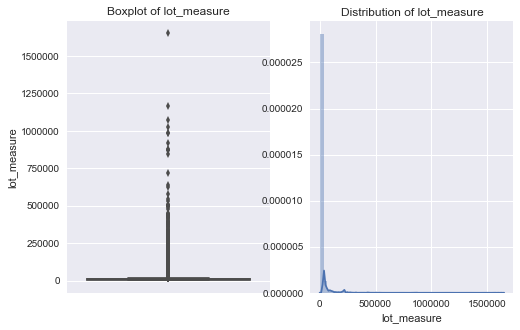

In [727]:
attributeAnalysis (dataSet.lot_measure)  

<b>Findings:</b>
* The distribution is not normalized. There are 2 clusters
* Postitive skewed and long tail. 
* 2425 Outliers. We will decide on removing outliers after performinh bi-variant analysis with target column.
* No missing values.

#### 3.1.2 ceil_measure Attribute

Range : Min - 290.0  Max - 9410.0
Mean : 1788.4  
Median : 1560.0 
Standard Deviation :  828.1 
1st Quartile (25%) : 1190.0
2nd Quartile (50%) : 1560.0
3st Quartile (75%) : 2210.0
IQR : 1020.0 
Count of Ouliers  :  611
Skewness : 1.45
Count of missing values : 0
Number of Zeros : 0


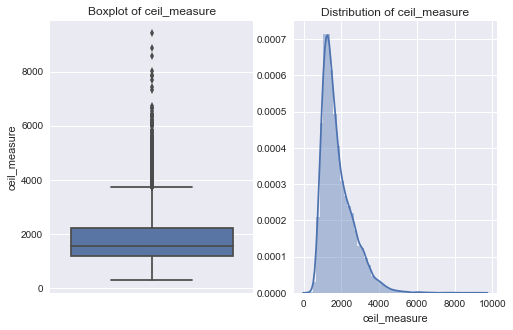

In [728]:
attributeAnalysis (dataSet.ceil_measure) 

<b>Findings:</b>
* The distribution looks normalized.
* Postitive skewed and long tail. 
* 611 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* No missing values.

#### 3.1.3 basement Attribute

Range : Min - 0.0  Max - 4820.0
Mean : 291.5  
Median : 0.0 
Standard Deviation :  442.6 
1st Quartile (25%) : 0.0
2nd Quartile (50%) : 0.0
3st Quartile (75%) : 560.0
IQR : 560.0 
Count of Ouliers  :  496
Skewness : 1.58
Count of missing values : 0
Number of Zeros : 13126


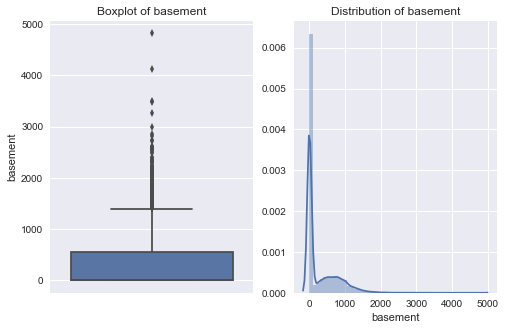

In [729]:
attributeAnalysis (dataSet.basement) 

<b>Findings:</b>
* The distribution is not normalized. It has 2 clusters
* Postitive skewed and long tail. 
* 496 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* No missing values.

#### 3.1.4 ceil Attribute

Range : Min - 1.0  Max - 3.5
Mean : 1.5  
Median : 1.5 
Standard Deviation :  0.5 
1st Quartile (25%) : 1.0
2nd Quartile (50%) : 1.5
3st Quartile (75%) : 2.0
IQR : 1.0 
Count of Ouliers  :  0
Skewness : 0.62
Count of missing values : 0
Number of Zeros : 0


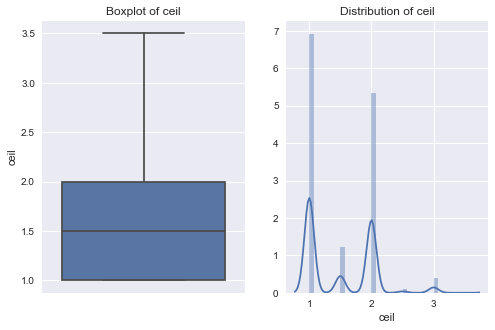

In [730]:
attributeAnalysis (dataSet.ceil)  

<b>Findings:</b>
* The distribution is not normalized. There are 4 clusters
* Postitive skewed. 
* 0 Outliers
* No missing values.

#### 3.1.5 room_bed Attribute

Range : Min - 0.0  Max - 33.0
Mean : 3.4  
Median : 3.0 
Standard Deviation :  0.9 
1st Quartile (25%) : 3.0
2nd Quartile (50%) : 3.0
3st Quartile (75%) : 4.0
IQR : 1.0 
Count of Ouliers  :  546
Skewness : 1.97
Count of missing values : 0
Number of Zeros : 13


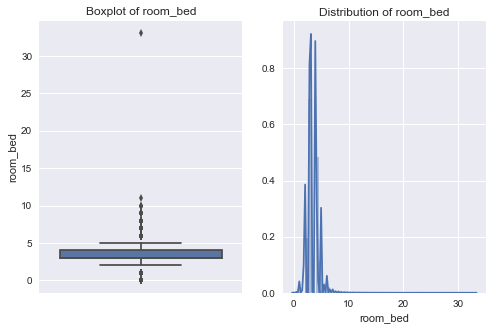

In [731]:
attributeAnalysis (dataSet.room_bed)  

<b>Findings:</b>
* The distribution is not normalized. It has lot of clusters
* Postitive skewed and long tail. 
* 546 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* There are 13 records with 0 bed rooms, it can be a valid case. 

#### 3.1.6 room_bath Attribute

Range : Min - 0.0  Max - 8.0
Mean : 2.1  
Median : 2.2 
Standard Deviation :  0.8 
1st Quartile (25%) : 1.8
2nd Quartile (50%) : 2.2
3st Quartile (75%) : 2.5
IQR : 0.8 
Count of Ouliers  :  571
Skewness : 0.51
Count of missing values : 0
Number of Zeros : 10


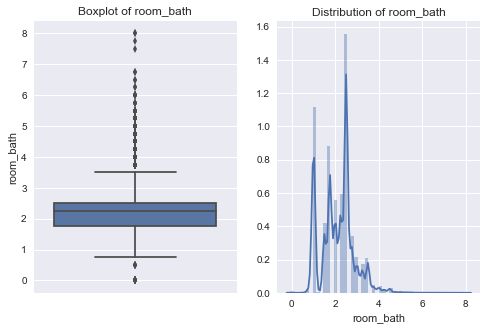

In [732]:
attributeAnalysis (dataSet.room_bath)  

<b>Findings:</b>
* The distribution is not normalized. There are lot of clusters
* Postitive skewed. 
* 571 Outliers. We will decide on removing outliers after performing bi-variant analysis with target column.
* There are 10 records with 0 bath rooms, it can be a valid case. 

#### 3.1.7 age_sold Attribute

Range : Min - -1.0  Max - 115.0
Mean : 43.3  
Median : 40.0 
Standard Deviation :  29.4 
1st Quartile (25%) : 18.0
2nd Quartile (50%) : 40.0
3st Quartile (75%) : 63.0
IQR : 45.0 
Count of Ouliers  :  0
Skewness : 0.47
Count of missing values : 0
Number of Zeros : 430


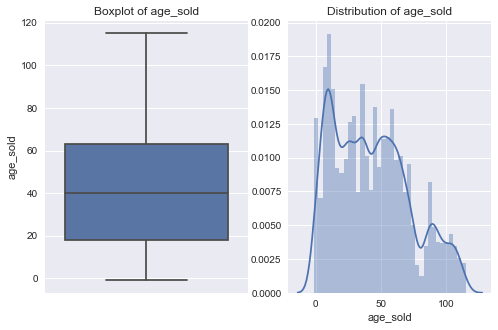

In [733]:
attributeAnalysis (dataSet.age_sold)  

<b>Findings:</b>
* The distribution is not normalized. There are lot of clusters
* Postitive skewed. 
* No outliers
* No missing values. There 430 records with 0 age, it means the house was sold on same year it was built.

#### 3.1.8 Price Attribute

Range : Min - 75000.0  Max - 7700000.0
Mean : 540182.2  
Median : 450000.0 
Standard Deviation :  367362.2 
1st Quartile (25%) : 321950.0
2nd Quartile (50%) : 450000.0
3st Quartile (75%) : 645000.0
IQR : 323050.0 
Count of Ouliers  :  1159
Skewness : 4.02
Count of missing values : 0
Number of Zeros : 0


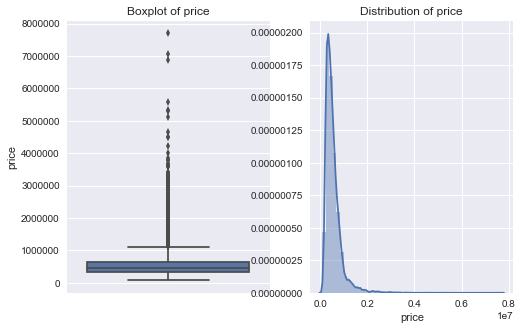

In [734]:
attributeAnalysis (dataSet.price)  

<b>Findings:</b>
* The distribution is kind of normalized
* Postitive skewed with long tail.
* There are 1159 outliers.
* No missing values. 

### 3.3 Univarient Analysis of Categorical Attributes

In [735]:
def displayCountPer(col):
    c = col.value_counts()
    p = col.value_counts(normalize=True)
    return pd.DataFrame(pd.concat([c,round(p*100,2)], axis=1, keys=['counts', '%']))

#### 3.3.1. coast Attribute

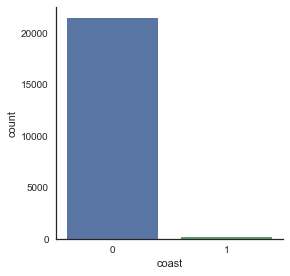

In [736]:
with sn.axes_style('white'):
    g = sn.factorplot("coast", data=dataSet, aspect=1, kind="count")
    g.set_xticklabels(step=1)

In [737]:
displayCountPer(dataSet.coast)

,counts,%
0,21450,99.25
1,163,0.75


<b>Findings:</b>
* Houses without waterfront view is Maximum.
* 99% of houses are without waterfront view

#### 3.3.2. condition Attribute

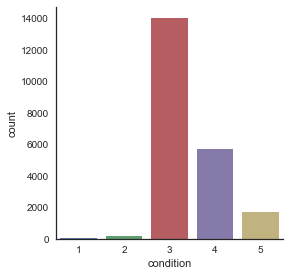

In [738]:
with sn.axes_style('white'):
    g = sn.factorplot("condition", data=dataSet, aspect=1,
                       kind="count")
    g.set_xticklabels(step=1)

In [739]:
displayCountPer(dataSet.condition)

,counts,%
3,14031,64.92
4,5679,26.28
5,1701,7.87
2,172,0.80
1,30,0.14


<b>Findings:</b>
* Houses with 3 & 4 grade condition is Maximum.
* 90% of houses fall under 3 & 4 condition grade

#### 3.3.3. quality Attribute

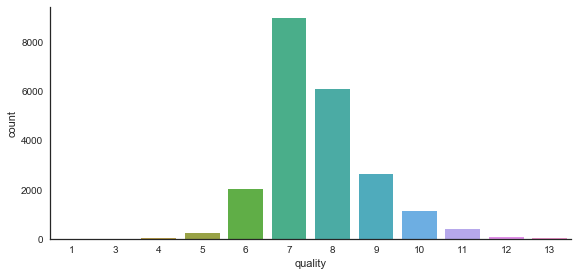

In [740]:
with sn.axes_style('white'):
    g = sn.factorplot("quality", data=dataSet, aspect=2,kind="count")
    g.set_xticklabels(step=1)

In [741]:
displayCountPer(dataSet.quality)

,counts,%
7,8981,41.55
8,6068,28.08
9,2615,12.10
6,2038,9.43
10,1134,5.25
11,399,1.85
5,242,1.12
12,90,0.42
4,29,0.13
13,13,0.06


<b>Findings:</b>
* Houses with 7 & 8 grade quality is Maximum.
* 70% of houses fall under 7 & 8 grade quality

#### 3.3.4. yr_built Attribute

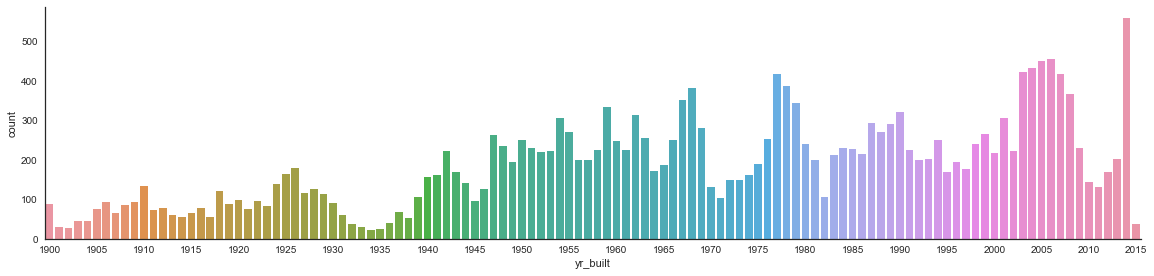

In [742]:
with sn.axes_style('white'):
    g = sn.factorplot("yr_built", data=dataSet, aspect=4,kind="count")
    g.set_xticklabels(step=5)

<b>Findings:</b>
* Houses construction has started increasing afer 1940

#### 3.3.5. zipcode Attribute

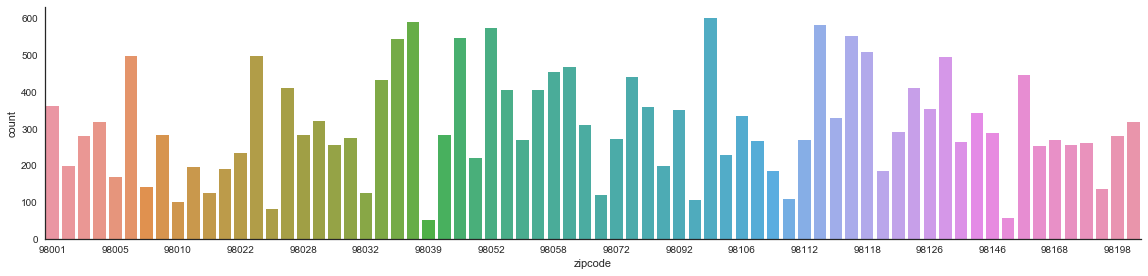

In [743]:
with sn.axes_style('white'):
    g = sn.factorplot("zipcode", data=dataSet, aspect=4,kind="count")
    g.set_xticklabels(step=4)

<b>Findings:</b>
* Houses are distributed across zipcodes. There is no specific pattern

#### 3.3.6. furnished Attribute

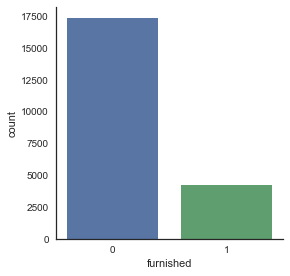

In [744]:
with sn.axes_style('white'):
    g = sn.factorplot("furnished", data=dataSet, aspect=1, kind="count")
    g.set_xticklabels(step=1)

In [745]:
displayCountPer(dataSet.furnished)

,counts,%
0,17362,80.33
1,4251,19.67


<b>Findings:</b>
* 80% houses are not furnished

#### 3.3.7. yr_sold Attribute

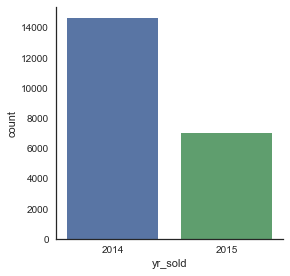

In [746]:
with sn.axes_style('white'):
    g = sn.factorplot("yr_sold", data=dataSet, aspect=1, kind="count")
    g.set_xticklabels(step=1)

In [747]:
displayCountPer(dataSet.yr_sold)

,counts,%
2014,14633,67.7
2015,6980,32.3


<b>Findings:</b>
* 68% houses are sold in 2014 and rest in 2015

#### 3.3.8. sight Attribute

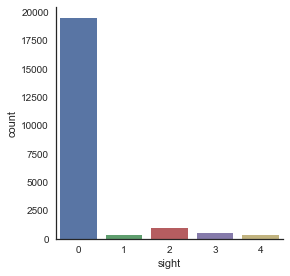

In [748]:
with sn.axes_style('white'):
    g = sn.factorplot("sight", data=dataSet, aspect=1, kind="count")
    g.set_xticklabels(step=1)

In [749]:
displayCountPer(dataSet.sight)

,counts,%
0,19489,90.17
2,963,4.46
3,510,2.36
1,332,1.54
4,319,1.48


<b>Findings:</b>
* 90% houses there are no visits

### 3.4 Multivarient Analysis

### 3.4.1 Relationship between Independent Attributes

In [750]:
#Check the pairplot for relationship bewteen features.
#sn.pairplot(dataSet,diag_kind='kde')

#### Findings of Diagonal Charts

* The findings independent attributes is covered in univarient analysis.

#### Findings on Relationship between Independent Attributes

* <b>room_bed</b>: It has positive linear relationship with room_bath and ceil_measure. Rest there is no relationship, scatter plot is like cloud. 
* <b>room_bath</b>: It has positive linear relationship with room_bed and ceil_measure. Rest there is no relationship, scatter plot is like cloud. 
* <b>lot_measure</b>: It does not seam to have relationship other attributes, scatter plot is like cloud. 
* <b>ceil</b>:It has positive linear relationship with room_bath and ceil_measure. Rest there is no relationship.
* <b>coast</b>:It has no relationship with other attributes
* <b>condition</b>:It has slight positive linear relationship with age sold.
* <b>Quality</b>:It has  positive linear relationship with ceil, room_bath,ceil_measure,furnished and year_built.
* <b>ceil_measure</b>:It has  positive linear relationship with ceil, room_bed,room_bath,quality,furnished and year_built.
* <b>basement</b>:It has no relationship with other attributes
* <b>yr_built</b>:It has  positive linear relationship with room_bath, ceil,quality,ceil_measure,long  and furnished.
* <b>yr_renovated</b>:It has no relationship with other attributes
* <b>zipcode</b>:It has  positive linear relationship with yr_sold.It has negative linear relationship with long
* <b>lat</b>:It has no relationship with other attributes
* <b>long</b>:It has  positive linear relationship with lot_measure, ceil_measure,  and yr_built. It has negative linear relationship with age_sold
* <b>furnished</b>:It has  positive linear relationship with room_bath, quality, ceil, ceil_measure & yr_built.
* <b>yr_sold</b>:It has no relationship with other attributes
* <b>age_sold</b>:It has negative linear relationship with room_bath,ceil,ceil_measure,quality,yr_bulit, long, furnished attributes.
* <b>renovation</b>: It has no relationship with other attributes.




### 3.4.2 Find correlation between continous variables

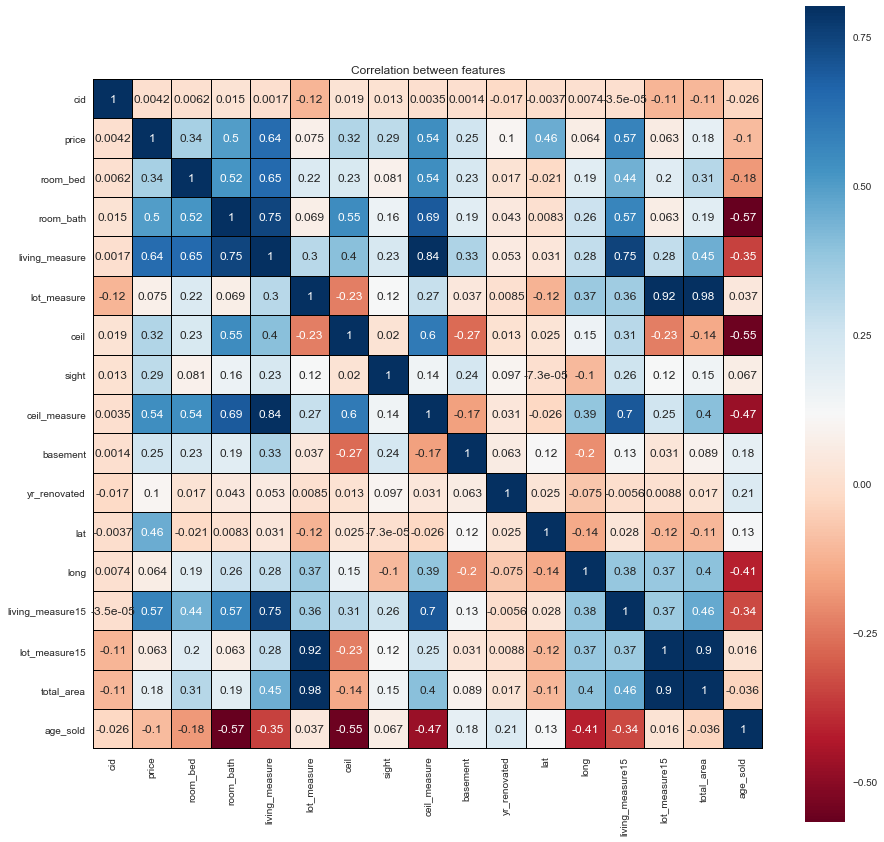

In [751]:

corMax=dataSet.corr(method='spearman')
plt.figure(figsize=(15, 15))
sn.heatmap(corMax, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="RdBu",linecolor="black")
plt.title('Correlation between features');

<b>Findings:</b>
* The correlationship between attributes is shown in a heat map. It also conveys the same message as in pairplot

#### Check the spread of houses using Lattitude and Longitude

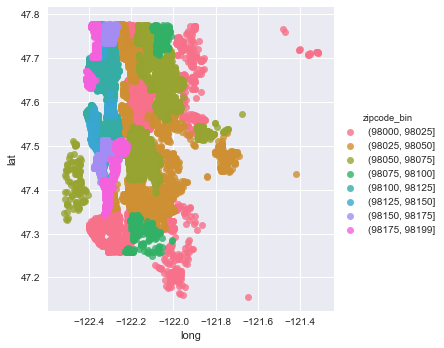

In [752]:
dataSet['zipcode_bin'] = pd.cut(dataSet.zipcode, bins=[98000, 98025, 98050,98075, 98100,98125, 98150, 98175, 98199])
sn.lmplot(y='lat',x='long', data=dataSet, hue='zipcode_bin', fit_reg=False)

<b>Findings:</b>
* From the above plot we can see that the all houses are colocated in a particular area.

### 3.4.3 Independent Numeric Attributes Relationship with Target Attribute (Price)

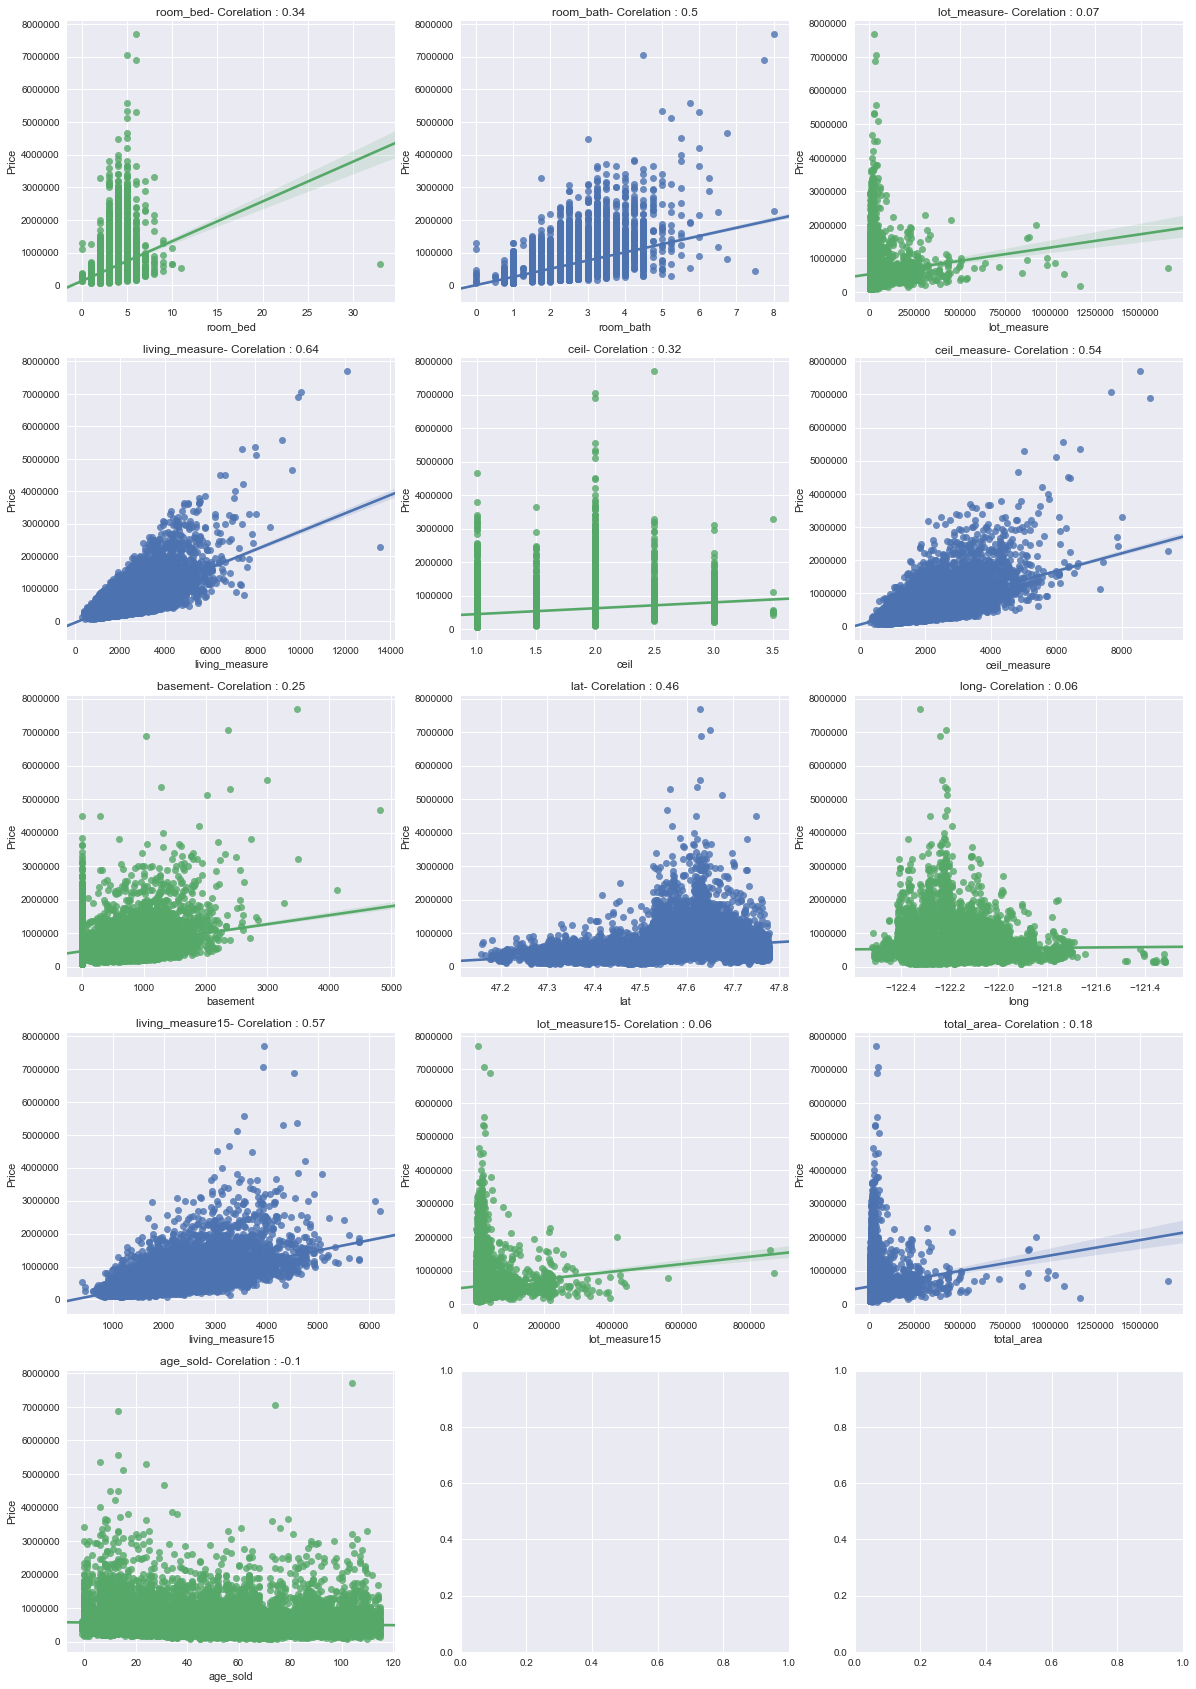

In [753]:
def getSpearmanr(indep, target):
    return indep.name + "- Corelation : " + str(round(spearmanr(indep, target)[0],2))

def plotIndividualChartsWithTarget():

    fig, axes =plt.subplots(5,3,figsize=(20,30))
    loc1 = axes[0,0]
    sn.regplot(x=dataSet.room_bed, y=dataSet.price, color="g", ax=loc1)
    loc1.set_ylabel('Price')
    loc1.set_title(getSpearmanr(dataSet.room_bed, dataSet.price))
    
    loc2 = axes[0,1]
    sn.regplot(x=dataSet.room_bath, y=dataSet.price, color="b", ax=loc2)
    loc2.set_ylabel('Price')
    loc2.set_title(getSpearmanr(dataSet.room_bath, dataSet.price))
    
    loc3 = axes[0,2]
    sn.regplot(x=dataSet.lot_measure, y=dataSet.price, color="g", ax=loc3)
    loc3.set_ylabel('Price')
    loc3.set_title(getSpearmanr(dataSet.lot_measure, dataSet.price))
    
    loc4 = axes[1,0]
    sn.regplot(x=dataSet.living_measure, y=dataSet.price, color="b", ax=loc4)
    loc4.set_ylabel('Price')
    loc4.set_title(getSpearmanr(dataSet.living_measure, dataSet.price))
    
    loc5 = axes[1,1]
    sn.regplot(x=dataSet.ceil, y=dataSet.price, color="g", ax=loc5)
    loc5.set_ylabel('Price')
    loc5.set_title(getSpearmanr(dataSet.ceil, dataSet.price))
    
    loc6 = axes[1,2]
    sn.regplot(x=dataSet.ceil_measure, y=dataSet.price, color="b", ax=loc6)
    loc6.set_ylabel('Price')
    loc6.set_title(getSpearmanr(dataSet.ceil_measure, dataSet.price))
    
    loc7 = axes[2,0]
    sn.regplot(x=dataSet.basement, y=dataSet.price, color="g", ax=loc7)
    loc7.set_ylabel('Price')
    loc7.set_title(getSpearmanr(dataSet.basement, dataSet.price))
    
    loc8 = axes[2,1]
    sn.regplot(x=dataSet.lat, y=dataSet.price, color="b", ax=loc8)
    loc8.set_ylabel('Price')
    loc8.set_title(getSpearmanr(dataSet.lat, dataSet.price))
    
    loc9 = axes[2,2]
    sn.regplot(x=dataSet.long, y=dataSet.price, color="g", ax=loc9)
    loc9.set_ylabel('Price')
    loc9.set_title(getSpearmanr(dataSet.long, dataSet.price))
    
    loc10 = axes[3,0]
    sn.regplot(x=dataSet.living_measure15, y=dataSet.price, color="b", ax=loc10)
    loc10.set_ylabel('Price')
    loc10.set_title(getSpearmanr(dataSet.living_measure15, dataSet.price))
    
    loc11 = axes[3,1]
    sn.regplot(x=dataSet.lot_measure15, y=dataSet.price, color="g", ax=loc11)
    loc11.set_ylabel('Price')
    loc11.set_title(getSpearmanr(dataSet.lot_measure15, dataSet.price))
    
    loc12 = axes[3,2]
    sn.regplot(x=dataSet.total_area, y=dataSet.price, color="b", ax=loc12)
    loc12.set_ylabel('Price')
    loc12.set_title(getSpearmanr(dataSet.total_area, dataSet.price))
    
    loc13 = axes[4,0]
    sn.regplot(x=dataSet.age_sold, y=dataSet.price, color="g", ax=loc13)
    loc13.set_ylabel('Price')
    loc13.set_title(getSpearmanr(dataSet.age_sold, dataSet.price))
    
plotIndividualChartsWithTarget()   

#### Findings:

<b>1. room_bed:</b>
* It has +ve linear relationship with price at .34 correlation
* Houses with 4,5,6 Bed rooms are priced higher.

<b>2. room_bath:</b>
* It has +ve linear relationship with price at .5 correlation
* As the bath rooms increases the price of the house too increases.

<b>3. lot_measure:</b>
* Surprisingly lot does not have a + ve linesr relationship with price.

<b>4. Living_measure:</b>
* It has +ve linear relationship with price at .64 correlation
* As the area increases the price of the house too increases, which is an expected behaviour.

<b>5. ceil:</b>
* It has +ve linear relationship with price at .32 correlation
* It is noticed that, Houses with 2 ceils are priced higher.

<b>6. ceil_measure:</b>
* It has +ve linear relationship with price at .64 correlation
* As the ceil area increases the price of the house too increases, which is an expected behaviour.

<b>7. Basement:</b>
* It has +ve linear relationship with price at .25 correlation
* As the basement area increases the price of the house too increases, which is an expected behaviour.

<b>7. Lat:</b>
* It has +ve linear relationship with price at .46 correlation
* There is not much change in latitude values. That means the houses are more or less in near by area. 

<b>8. Long:</b>
* There is no coorelation with price. The corelation value is -0.06.

<b>9. Living_measure15:</b>
* It has +ve linear relationship with price at .57 correlation
* The living measure is a measurement taken in year 2015.

<b>10. Lot_measure15:</b>
* Surprisingly lot does not have a + ve linear relationship with price.

<b>11. Total_area:</b>
* It is a total of Living Measure + Lot Measure, so it also does not show any relationship with price.

<b>12. Age_sold:</b>
* There is no coorelation with price. The corelation value is -0.01.

### 3.4.4 Independent Categorical Attributes Relationship with Target Attribute (Price)

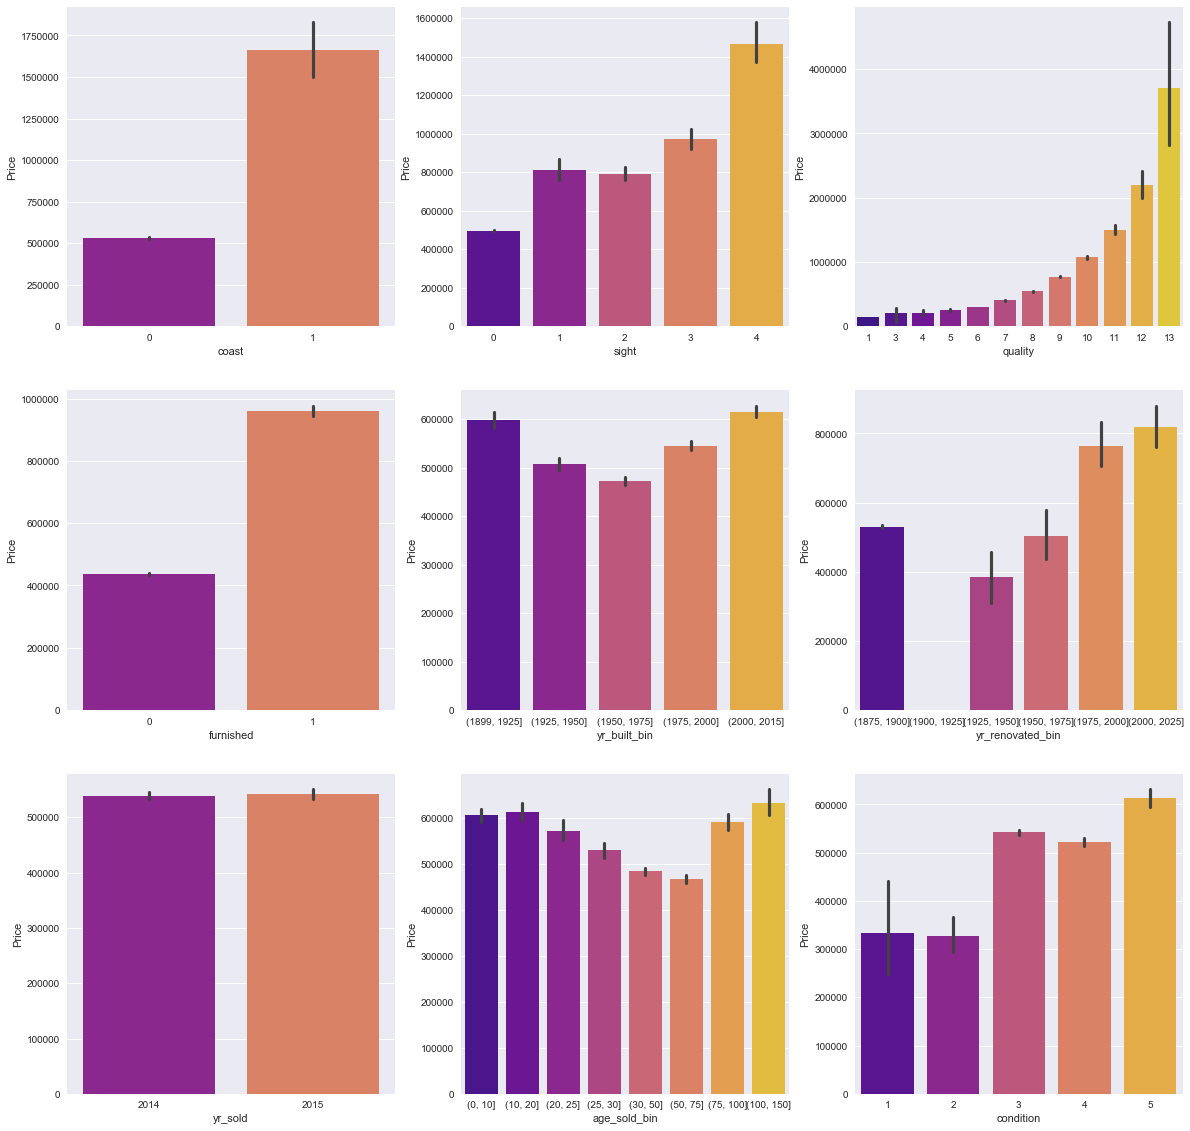

In [754]:
def plotCategoricalChartsWithTarget():
    fig, axes =plt.subplots(3,3,figsize=(20,20))
    loc1 = axes[0,0]
    sn.barplot(x =dataSet.coast, y =dataSet.price, estimator = np.mean, palette ='plasma', ax=loc1)
    loc1.set_ylabel('Price')
    #loc1.set_title(getSpearmanr(dataSet.coast, dataSet.price))
    
    loc2 = axes[0,1]
    sn.barplot(x =dataSet.sight, y =dataSet.price, estimator = np.mean, palette ='plasma', ax=loc2)
    loc2.set_ylabel('Price')
    #loc2.set_title(getSpearmanr(dataSet.sight, dataSet.price))
    
    loc3 = axes[0,2]
    sn.barplot(x =dataSet.quality, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc3)
    loc3.set_ylabel('Price')
    #loc3.set_title(getSpearmanr(dataSet.quality, dataSet.price))
    
    loc4 = axes[1,0]
    sn.barplot(x =dataSet.furnished, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc4)
    loc4.set_ylabel('Price')
    #loc4.set_title(getSpearmanr(dataSet.furnished, dataSet.price))
    
    
    loc5 = axes[1,1]
    dataSet['yr_built_bin'] = pd.cut(dataSet.yr_built, bins=[1899,1925,1950,1975,2000,2015])
    sn.barplot(x =dataSet.yr_built_bin, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc5)
    loc5.set_ylabel('Price')
    #loc5.set_title(getSpearmanr(dataSet.yr_built, dataSet.price))
    
    loc6 = axes[1,2]
    #Set wherever renovated year is zero as 1890. It just a year for binning purpose.
    dataSet.loc[dataSet.yr_renovated == 0, "yr_renovated"]=1890
    dataSet['yr_renovated_bin'] = pd.cut(dataSet.yr_renovated, bins=[1875,1900,1925,1950,1975,2000,2025])
    sn.barplot(x =dataSet.yr_renovated_bin, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc6)
    loc6.set_ylabel('Price')
    #loc6.set_title(getSpearmanr(dataSet.yr_renovated, dataSet.price))
    
    loc7 = axes[2,0] 
    sn.barplot(x =dataSet.yr_sold, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc7)
    loc7.set_ylabel('Price')
    #loc7.set_title(getSpearmanr(dataSet.yr_sold, dataSet.price))
    
    loc8 = axes[2,1] 
    dataSet['age_sold_bin'] = pd.cut(dataSet.age_sold, bins=[0,10,20,25,30,50, 75, 100, 150])
    sn.barplot(x =dataSet.age_sold_bin, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc8)
    loc8.set_ylabel('Price')
    #loc8.set_title(getSpearmanr(dataSet.age_sold, dataSet.price))
    
    
    loc9 = axes[2,2] 
    sn.barplot(x =dataSet.condition, y =dataSet.price,  estimator = np.mean, palette ='plasma', ax=loc9)
    loc9.set_ylabel('Price')
    #loc9.set_title(getSpearmanr(dataSet.condition, dataSet.price))
    
plotCategoricalChartsWithTarget()   

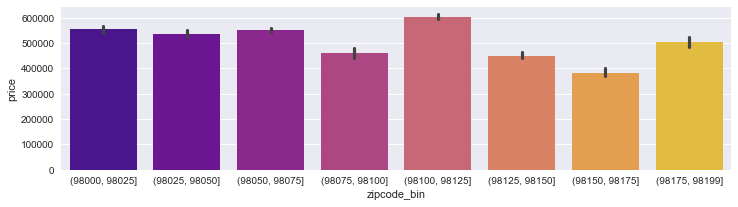

In [755]:
#dataSet['zipcode_bin'] = pd.cut(dataSet.zipcode, bins=[98000, 98025, 98050,98075, 98100,98125, 98150, 98175, 98199])
plt.figure(figsize=(12,3))
sn.barplot(x =dataSet.zipcode_bin, y =dataSet.price,  estimator = np.mean, palette ='plasma')
#plt.title(getSpearmanr(dataSet.zipcode, dataSet.price))

#### Findings

<b>1. Coast:</b>
* The water front side has higher avg price compared to non water from houses.

<b>2. sight:</b>
* The houses where there is max visits has higher avg price.
* It means as the customer visits increases house demand also increases hence price too.

<b>3. quality:</b>
* The houses with highest quality grade has higher avg price.

<b>4. furnished:</b>
* The furnished houses has higher avg price.

<b>5. yr_built:</b>
* The houses built in 1900-1925 and 2000-2015 has high avg price.
* That means antique and new house get better price.

<b>6. yr_renovated:</b>
* The bar with 1875-1900 reprsents houses not renovated.
* The more recent a house is renovated to selling time, the better price it gets.

<b>7. yr_sold:</b>
* All houses were sold in 2014 and 2015.
* there is no major difference in average price.

<b>8. age_sold:</b>
* The finding is same as yr_built.
* Houses which are 0-10 years old get good price and at the same time houses which are 75+ years are getting better price.

<b>9. condition:</b>
* The finding is same as quality.
* The houses with highest condition grade has higher avg price.

<b>10. zipcode:</b>
* Houses under zipcode 98100-98125 has higher avg price.

## 4. Feature Engineering (Week 3 Activity - In Progress)

We will implement below techniques.

* 1.Imputation
* 2.Handling Outliers
* 3.Binning
* 4.Log Transform
* 5.One-Hot Encoding
* 6.Mean Encoding
* 7.Remove redundant atttributes
* 8.Identify important attributes


### 4.1 Imputation 

* In the dataset, there are no missing values or null values for Numerical Imputation or Categorical Imputation
* There are 2 cases where data needs to be fixed, it is listed below.

In [756]:
# In one of the record there is 33 bed rooms which might be a typo. Replace it will 3.
dataSet.loc[dataSet.room_bed == 33, 'room_bed'] = 3

# There 12 records for which year built is 2015 and year sold is 2014. We will fix by replacing year built as 2014
dataSet.loc[dataSet.age_sold == -1, 'yr_built'] = 2014
dataSet.loc[dataSet.age_sold == -1, 'age_sold'] = 0

### 4.2. Handle Outliers post comparision with target attribute

* The outliers identified during univariant analysis will be fixed after analysing its impact to target attribute

In [757]:
def displayCorrvalues(dataSet, cleanedDataset, colName):
    results = pd.DataFrame()
    
    corrWithOutlier = spearmanr(dataSet[colName], dataSet.price)[0]
    corrOutlierRemoved = spearmanr(cleanedDataset[colName], cleanedDataset.price)[0]
    
    results = results.append({'Attribute': colName, \
                        'Corr With Outliers': corrWithOutlier, \
                        'Corr Without Outliers': corrOutlierRemoved},ignore_index=True)
    results = results[['Attribute', 'Corr With Outliers', 'Corr Without Outliers']]
    
    return results

#Function to replace outliers lying outside IQR range with median value.
def getDataSetwithoutOutlier (dataSet, cleanedDataset, colName):
    col = dataSet[colName]
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    max_value = Q3+(1.5*IQR)
    min_value = Q1-(1.5*IQR) 
    
    cleanedDataset.loc[(cleanedDataset[colName] < min_value) | (cleanedDataset[colName] > max_value), colName] = \
    cleanedDataset[colName].median()
    
    return cleanedDataset


In [758]:
def checkOutlierComparedWithTarget (dataSet, colName):
    fig, (ax1, ax2) =plt.subplots(1,2, figsize=(20,5))
    sn.regplot(x=dataSet[colName], y=dataSet.price, color="g", ax=ax1)
    ax1.set_ylabel('Price')
    ax1.set_title("With outliers in {}".format(colName))
    cleanedDataset = dataSet.copy()
    cleanedDataset = getDataSetwithoutOutlier (dataSet, cleanedDataset, colName)
    #print("Count of Outliers in cleanedDataset {}".format(len(findOutliers(cleanedDataset[colName]))))
    #print ("Mean of cleanedDataset {}".format(cleanedDataset[colName].mean()))
    sn.regplot(x=cleanedDataset[colName], y=cleanedDataset.price, color="r", ax=ax2)
    ax2.set_ylabel('Price')
    ax2.set_title("Without outliers in {}".format(colName))

    return displayCorrvalues(dataSet, cleanedDataset, colName)
    

In [759]:
#Function to replace outliers lying outside IQR range with median value.
def fixOutlier (dataSet, col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    max_value = Q3+(1.5*IQR)
    min_value = Q1-(1.5*IQR) 
    dataSet.loc[(col < min_value) | (col > max_value), col.name] = col.median()

#### 4.2.1 Check and Fix Outliers for basement

In [760]:
#checkOutlierComparedWithTarget(dataSet, dataSet.basement.name)

<b>Findings:</b>
* There is corr diff with and without outliers, hence it needs to be fixed.

In [761]:
# call fundtion to fix outlier
fixOutlier(dataSet, dataSet.basement)

#### 4.2.2. Check and Fix Outliers for lot measure

In [762]:
#checkOutlierComparedWithTarget(dataSet, dataSet.lot_measure.name)

<b>Findings:</b>
* There is corr diff with and without outliers, hence it needs to be fixed.

In [763]:
# call fundtion to fix outlier
fixOutlier(dataSet, dataSet.lot_measure)

#### 4.2.3. Check and Fix Outliers for ceil measure

In [764]:
#checkOutlierComparedWithTarget(dataSet, dataSet.ceil_measure.name)

<b>Findings:</b>
* There is corr diff with and without outliers, hence it needs to be fixed.

In [765]:
# call fundtion to fix outlier
fixOutlier(dataSet, dataSet.ceil_measure)

#### 4.2.4 Check and Fix Outliers for Bed Rooms

In [766]:
#checkOutlierComparedWithTarget(dataSet, dataSet.room_bed.name)

<b>Findings:</b>
* There is no major corr diff with and without outliers, hence no need to fix the outliers for room_bed.

#### 4.2.5 Check and Fix Outliers for Bath Rooms

In [767]:
#checkOutlierComparedWithTarget(dataSet, dataSet.room_bath.name)

<b>Findings:</b>
* There is corr diff with and without outliers, hence it needs to be fixed.

In [768]:
# call fundtion to fix outlier
fixOutlier(dataSet, dataSet.room_bath)

### 4.3. Binning of Numerical & Categorical Attributes

In [769]:
quantile_list = [0, .25, .5, .75, 1.]
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']

def addBinningColumn(col, quantile_list, quantile_labels):
    dataSet[col.name + '_quantile_bin'] = pd.qcut(
                                            col, 
                                            q=quantile_list,       
                                            labels=quantile_labels, duplicates='drop')
    dataSet[col.name + '_quantile_bin'] = pd.Categorical(dataSet[col.name + '_quantile_bin'])
    dataSet[col.name + '_quantile_bin']= dataSet[col.name + '_quantile_bin'].cat.add_categories('None')
    dataSet[col.name + '_quantile_bin'].fillna("None", inplace=True)
    print(dataSet[[col.name, col.name + '_quantile_bin']].head(10))

def plotBinningChart(col,colName, quantile_list1, quantile_labels1):
    fig, ax = plt.subplots()
    col.hist(bins=30, color='#A9C5D3', 
                                 edgecolor='black', grid=False)
    quantiles = col.quantile(quantile_list1)
    for quantile in quantiles:
        qvl = plt.axvline(quantile, color='r')
    ax.legend([qvl], ['Quantiles'], fontsize=10)
    ax.set_title( colName + 'Histogram with Quantiles', 
                 fontsize=12)
    ax.set_xlabel(colName, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)



#### 4.3.1 Binning of Age Sold

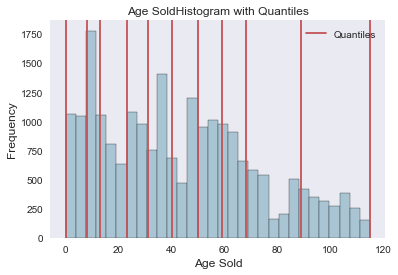

In [770]:
quantile_list_age = [0, .1, .2, .3, .4,.5,.6,.7,.8, .9, 1]
#quantile_labels_age = ['< 10Yrs', '10-20Yrs', '20-30Yrs', '30-40Yrs', '40-50Yrs', '50-60Yrs', '60-70Yrs', '70-80Yrs', '80-90Yrs', '> 90Yrs']
quantile_labels_age = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

plotBinningChart(dataSet.age_sold, "Age Sold", quantile_list_age, quantile_labels_age)



In [771]:
# Add a column for age sold with binning of data.
addBinningColumn(dataSet.age_sold, quantile_list_age, quantile_labels_age)

   age_sold age_sold_quantile_bin
0        58                    60
1        38                    40
2         9                    10
3        98                    90
4        61                    70
5        25                    30
6        60                    70
7        65                    70
8        61                    70
9        45                    50


<b>Key Callout:</b>
* Age sold is binned into 10 groups

#### 4.3.2 Binning of Latitude and Longitude into Regions

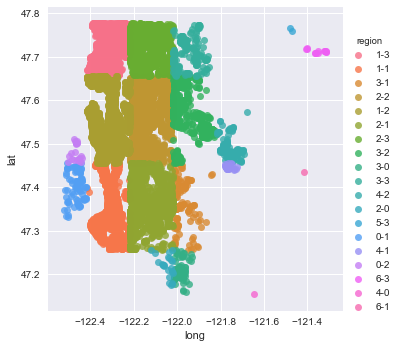

In [850]:
longmin = dataSet['long'].min()
latmin = dataSet['lat'].min()

data_ = {'key':['longmin', 'latmin', ], 'val':[longmin, latmin]} 

lat_long_df = pd.DataFrame(data_) 
lat_long_df.set_index("key", inplace = True) 

lat_long_df.to_csv('../data/lat_long_df.csv')

dataSet['long_bin'] = dataSet['long'].apply(lambda val: round(( abs(longmin) - abs(val)) /.2))
dataSet['lat_bin'] = dataSet['lat'].apply(lambda val: round(( abs(val) - abs(latmin) )/.2))
dataSet['region'] = dataSet.apply (lambda row: str(row['long_bin'])+'-'+str(row['lat_bin']), axis=1)
#dataSet.region = pd.Categorical(dataSet.region).codes
dataSet['Region_name']= dataSet.apply (lambda row: "Region"+'-'+str(row['region']), axis=1)
#dataSet.drop(['long_bin', 'lat_bin', 'region'], axis=1, inplace=True)
sn.lmplot(y='lat',x='long', data=dataSet, hue='region', fit_reg=False)

In [773]:
dataSet[['lat','long', 'long_bin', 'lat_bin', 'region']]

,lat,long,long_bin,lat_bin,region
0,47.7174,-122.336,1,3,1-3
1,47.3165,-122.386,1,1,1-1
2,47.3515,-121.999,3,1,3-1
3,47.7049,-122.349,1,3,1-3
4,47.6768,-122.269,1,3,1-3
...,...,...,...,...,...
21608,47.3258,-122.165,2,1,2-1
21609,47.3772,-122.127,2,1,2-1
21610,47.4827,-121.773,4,2,4-2
21611,47.7648,-122.159,2,3,2-3


<b>Key Callout:</b>
* The lattitude and Longitude is grouped into 20 Regions of each 0.2 x 0.2 size

#### 4.3.3 Binning Condition

Text(0.5,1,'Binned Distribution')

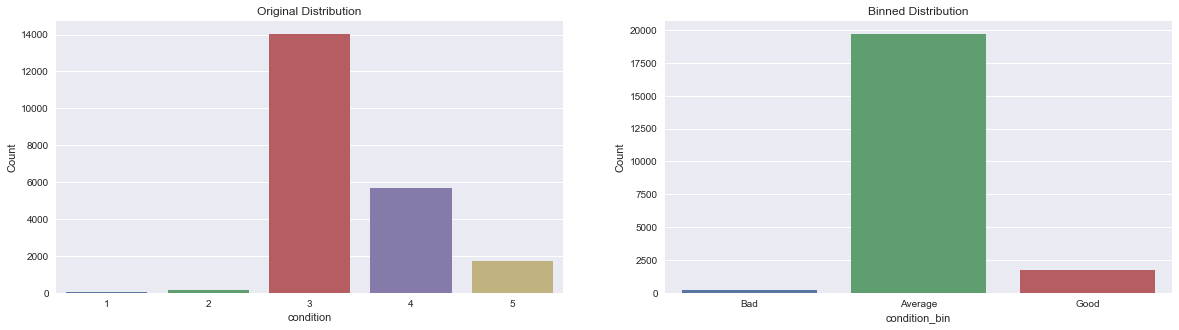

In [774]:
conditions = [
    dataSet['condition'] == 1,
    dataSet['condition'] == 2,
    dataSet['condition'] == 3,
    dataSet['condition'] == 4,
    dataSet['condition'] == 5]

choices = ['Bad', 'Bad', 'Average', 'Average', 'Good']
dataSet['condition_bin'] = np.select(conditions, choices)

fig,(ax1, ax2) =plt.subplots(1,2, figsize=(20,5))

sn.countplot(dataSet.condition, ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title("Original Distribution")


sn.countplot(dataSet.condition_bin, ax=ax2, order = ['Bad', 'Average', 'Good'])
ax2.set_ylabel('Count')
ax2.set_title("Binned Distribution")

<b>Key Callout:</b>
* The condtion is binned into 3 groups Bad (1,2), Average(3,4), & Good (5)

#### 4.3.4 Binning Quality

Text(0.5,1,'Binned Distribution')

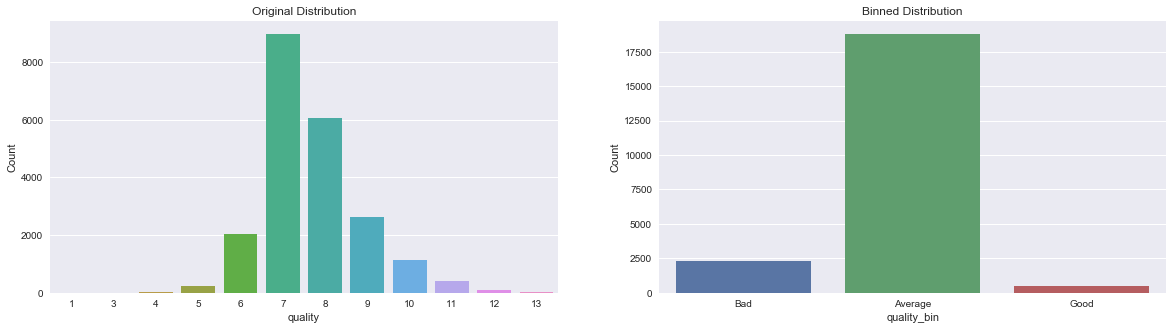

In [775]:
conditions = [
    dataSet['quality'] < 7,
    dataSet['quality'] == 7,
    dataSet['quality'] == 8,
    dataSet['quality'] == 9,
    dataSet['quality'] == 10,
    dataSet['quality'] > 10]

choices = ['Bad', 'Average','Average','Average','Average', 'Good']
dataSet['quality_bin'] = np.select(conditions, choices)

fig,(ax1, ax2) =plt.subplots(1,2, figsize=(20,5))

sn.countplot(dataSet.quality, ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title("Original Distribution")


sn.countplot(dataSet.quality_bin, ax=ax2, order = ['Bad', 'Average', 'Good'])
ax2.set_ylabel('Count')
ax2.set_title("Binned Distribution")

<b>Key Callout:</b>
* The quality is binned into 3 groups Bad (<=6 ), Average(7-10), & Good (>10)

#### 4.3.5 Binning Bed Rooms

Text(0.5,1,'Binned Distribution')

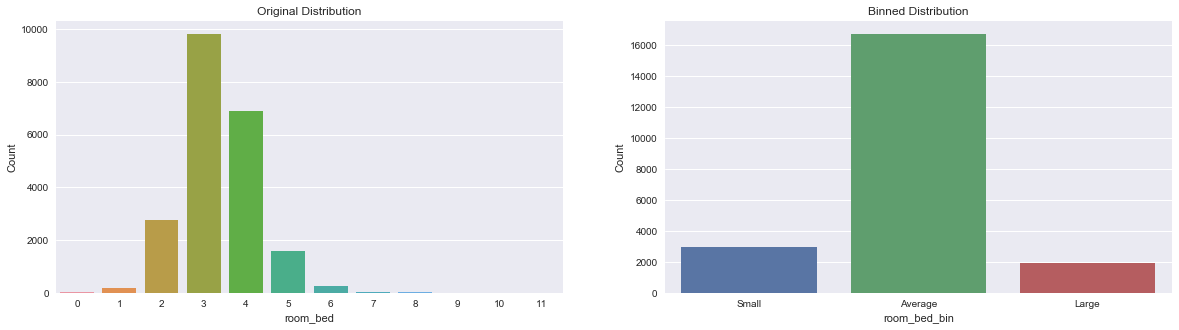

In [776]:
conditions = [
    dataSet['room_bed'] < 3,
    dataSet['room_bed'] == 3,
    dataSet['room_bed'] == 4,
    dataSet['room_bed'] == 5,
    dataSet['room_bed'] == 6,
    dataSet['room_bed'] > 6]

choices = ['Small','Average','Average','Large','Large','Large']
dataSet['room_bed_bin'] = np.select(conditions, choices)

fig,(ax1, ax2) =plt.subplots(1,2, figsize=(20,5))

sn.countplot(dataSet.room_bed, ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title("Original Distribution")

sn.countplot(dataSet.room_bed_bin, ax=ax2, order = ['Small','Average','Large'])
ax2.set_ylabel('Count')
ax2.set_title("Binned Distribution")

<b>Key Callout:</b>
* The condition is binned into 3 groups Small ( < 3 ), Average(3-6), & Large (>6)

#### 4.3.6 Binning Bath Rooms

Text(0.5,1,'Binned Distribution')

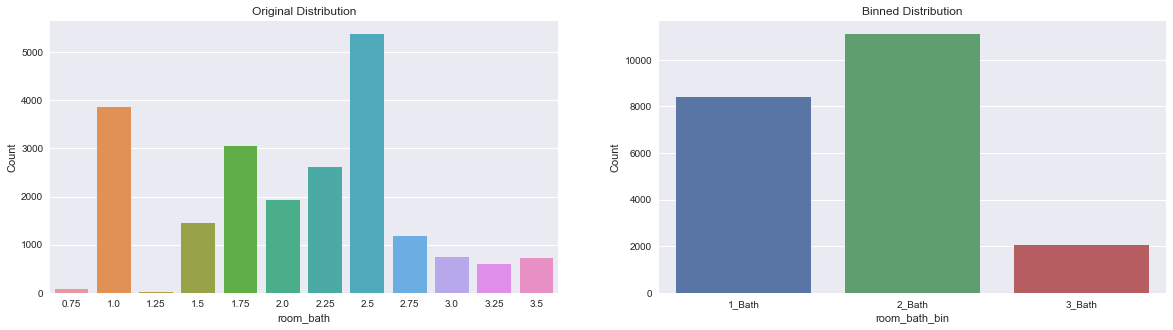

In [777]:
def binBath(x):
    if (x < 2):
        return "1_Bath"
    elif (x >= 2 and x <3):
        return "2_Bath"
    elif (x >= 3):
        return "3_Bath"
    else :
        return
    

dataSet['room_bath_bin'] = dataSet['room_bath'].apply(lambda val: binBath(val))


fig,(ax1, ax2) =plt.subplots(1,2, figsize=(20,5))

sn.countplot(dataSet.room_bath, ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title("Original Distribution")

sn.countplot(dataSet.room_bath_bin, ax=ax2, order = ['1_Bath','2_Bath','3_Bath'])
ax2.set_ylabel('Count')
ax2.set_title("Binned Distribution")

<b>Key Callout:</b>
* The bath rooms is binned into 3 groups 1 Bath ( < 2 ), 2 Bath(>2 and <3), & 3 bath (>3)

#### 4.3.7 Binning Ceil

Text(0.5,1,'Binned Distribution')

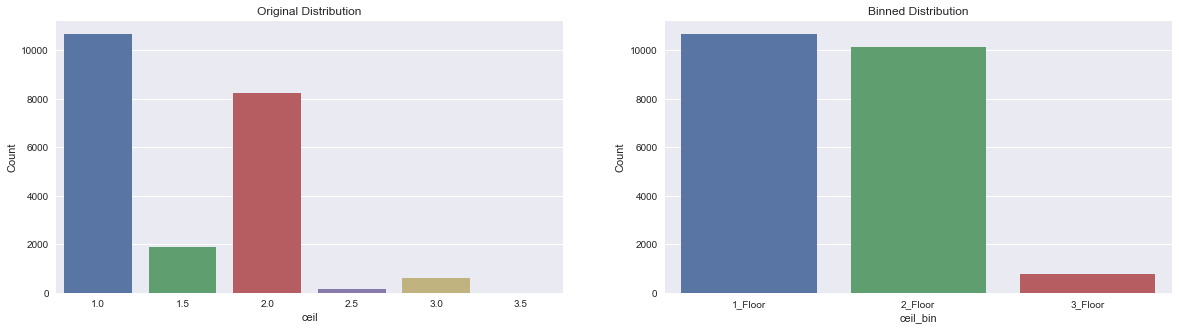

In [778]:
def binCeil(x):
    if (x <= 1):
        return "1_Floor"
    elif (x > 1 and x <= 2):
        return "2_Floor"
    elif (x > 2):
        return "3_Floor"
    else :
        return
    

dataSet['ceil_bin'] = dataSet['ceil'].apply(lambda val: binCeil(val))


fig,(ax1, ax2) =plt.subplots(1,2, figsize=(20,5))

sn.countplot(dataSet.ceil, ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title("Original Distribution")

sn.countplot(dataSet.ceil_bin, ax=ax2, order = ['1_Floor','2_Floor','3_Floor'])
ax2.set_ylabel('Count')
ax2.set_title("Binned Distribution")

<b>Key Callout:</b>
* The ceil is binned into 3 groups 1 Floor ( <= 1 ), 2 Floor(>=2 and <3), & 3 Floor (>2)

#### 4.3.8 Binning sight

Text(0.5,1,'Binned Distribution')

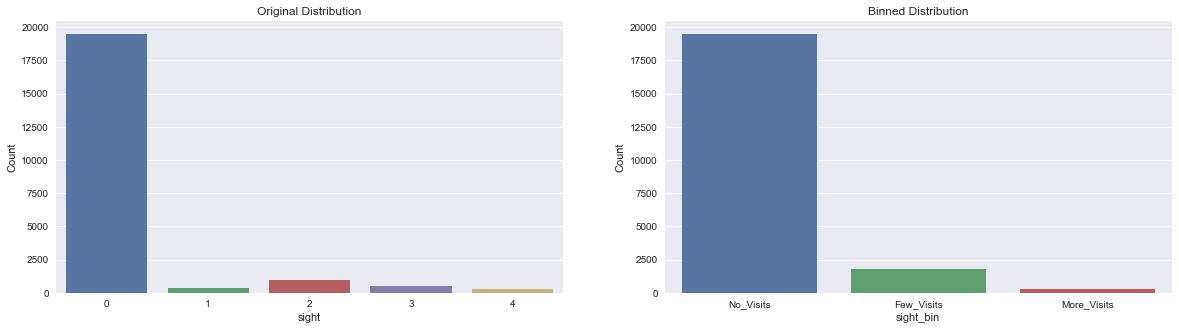

In [779]:
def binSight(x):
    if (x == 0):
        return "No_Visits"
    elif (x >= 1 and x <= 3):
        return "Few_Visits"
    elif (x > 3):
        return "More_Visits"
    else :
        return
    

dataSet['sight_bin'] = dataSet['sight'].apply(lambda val: binSight(val))


fig,(ax1, ax2) =plt.subplots(1,2, figsize=(20,5))

sn.countplot(dataSet.sight, ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title("Original Distribution")

sn.countplot(dataSet.sight_bin, ax=ax2, order = ['No_Visits','Few_Visits','More_Visits'])
ax2.set_ylabel('Count')
ax2.set_title("Binned Distribution")

<b>Key Callout:</b>
* The sights is binned into 3 groups No Visits, Less Visits & More Visits

#### 4.3.9 Binning Year Built

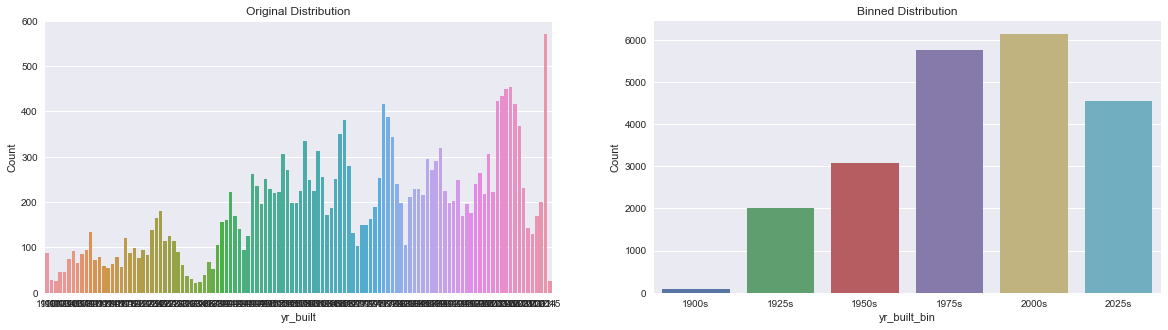

In [780]:
def binYrBuilt(val):
    if str(val).find("1875, 1900") > 0:
        return "1900s"
    elif str(val).find("1900, 1925") > 0:
        return "1925s"
    elif str(val).find("1925, 1950") > 0:
        return "1950s"
    elif str(val).find("1950, 1975") > 0:
        return "1975s"
    elif str(val).find("1975, 2000") > 0:
        return "2000s"
    elif str(val).find("2000, 2025") > 0:
        return "2025s"
    else :
        return "Others"
    
    

dataSet['yr_built_tmpbin'] = pd.cut(dataSet.yr_built, bins=[1875,1900,1925,1950,1975,2000,2025])

dataSet['yr_built_bin'] = dataSet['yr_built_tmpbin'].apply(lambda val: binYrBuilt(val) )


fig,(ax1, ax2) =plt.subplots(1,2, figsize=(20,5))

sn.countplot(dataSet.yr_built, ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title("Original Distribution")


sn.countplot(dataSet.yr_built_bin, ax=ax2, order = ['1900s', '1925s','1950s','1975s','2000s', '2025s'])
ax2.set_ylabel('Count')
ax2.set_title("Binned Distribution")

dataSet.drop(['yr_built_tmpbin'], axis=1, inplace=True)

<b>Key Callout:</b>
* The year built is binned into 6 groups based in the year.

In [781]:
null_columns=dataSet.columns[dataSet.isnull().any()]
dataSet[null_columns].isnull().sum()
#dataSet[dataSet["yr_renovated_tmpbin"].isnull()][['yr_renovated',"yr_renovated_tmpbin"]]

age_sold_bin    442
dtype: int64

#### 4.3.10 Binning Year Renovated

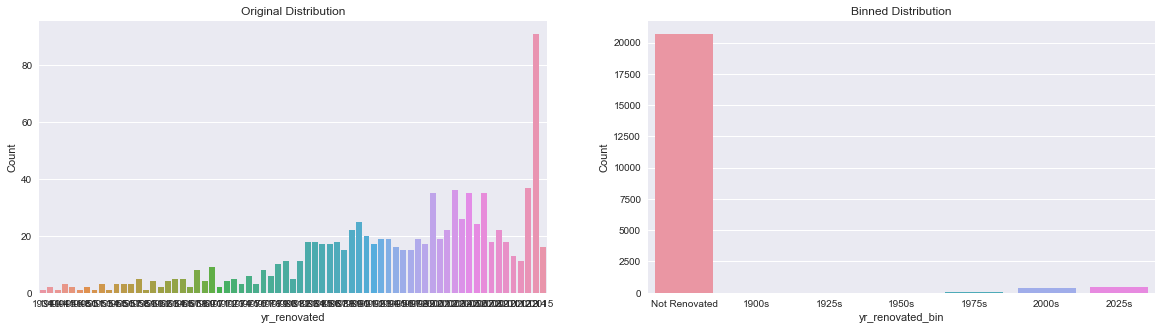

In [782]:
def binYrRenovated(val, year):
    #print ("--> {} {}".format(str(val), (str(val).find("1900, 1925") > 0)))
    if (year == 0 or year == 1890):
        return "Not Renovated"
    elif str(val).find("1875, 1900") > 0:
        return "1900s"
    elif str(val).find("1900, 1925") > 0:
        return "1925s"
    elif str(val).find("1925, 1950") > 0:
        return "1950s"
    elif str(val).find("1950, 1975") > 0:
        return "1975s"
    elif str(val).find("1975, 2000") > 0:
        return "2000s"
    elif str(val).find("2000, 2025") > 0:
        return "2025s"
    else:
        return "Others"
    
#Set wherever renovated year is zero as 1890. It just a year for binning purpose.
dataSet.loc[(dataSet.yr_renovated == 0), "yr_renovated"]=1890    

dataSet['yr_renovated_tmpbin'] = pd.cut(dataSet.yr_renovated, bins=[1875,1900,1925,1950,1975,2000,2025])

dataSet['yr_renovated_bin'] = dataSet.apply(lambda val: binYrRenovated(val['yr_renovated_tmpbin'], val['yr_renovated']), axis=1 )


fig,(ax1, ax2) =plt.subplots(1,2, figsize=(20,5))

sn.countplot(dataSet.yr_renovated[dataSet['yr_renovated'] > 1890], ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title("Original Distribution")


sn.countplot(dataSet.yr_renovated_bin, ax=ax2, order = ['Not Renovated','1900s', '1925s','1950s','1975s','2000s', '2025s'])
ax2.set_ylabel('Count')
ax2.set_title("Binned Distribution")

dataSet.drop(['yr_renovated_tmpbin'], axis=1, inplace=True)

<b>Key Callout:</b>
* There are only 914 houses renovated. 
* The 914 are binned into 3 groups based on the year
* Rest are bucketed under "Not Renovated" group.

#### 4.3.11 Binning Zip Code

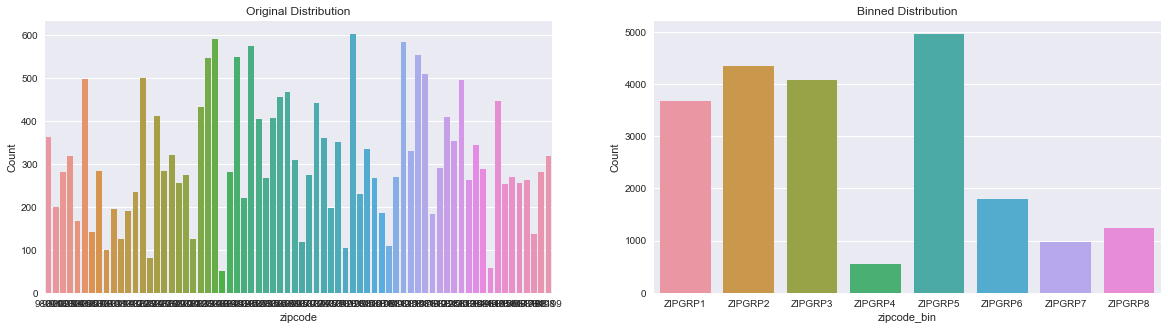

In [783]:
def binZipcode(val):
    #print ("--> {} {}".format(str(val), (str(val).find("1900, 1925") > 0)))

    if str(val).find("98000, 98025") > 0:
        return "ZIPGRP1"
    elif str(val).find("98025, 98050") > 0:
        return "ZIPGRP2"
    elif str(val).find("98050, 98075") > 0:
        return "ZIPGRP3"
    elif str(val).find("98075, 98100") > 0:
        return "ZIPGRP4"
    elif str(val).find("98100, 98125") > 0:
        return "ZIPGRP5"
    elif str(val).find("98125, 98150") > 0:
        return "ZIPGRP6"
    elif str(val).find("98150, 98175") > 0:
        return "ZIPGRP7"
    elif str(val).find("98175, 98199") > 0:
        return "ZIPGRP8"
    else:
        return "Others"

dataSet['zipcode_tmpbin'] = pd.cut(dataSet.zipcode, bins=[98000, 98025, 98050,98075, 98100,98125, 98150, 98175, 98199])


dataSet['zipcode_bin'] = dataSet.apply(lambda val: binZipcode(val['zipcode_tmpbin']), axis=1 )


fig,(ax1, ax2) =plt.subplots(1,2, figsize=(20,5))

sn.countplot(dataSet.zipcode , ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title("Original Distribution")


sn.countplot(dataSet.zipcode_bin, ax=ax2, order = ['ZIPGRP1','ZIPGRP2', 'ZIPGRP3','ZIPGRP4','ZIPGRP5','ZIPGRP6', 'ZIPGRP7', 'ZIPGRP8'])
ax2.set_ylabel('Count')
ax2.set_title("Binned Distribution")

dataSet.drop(['zipcode_tmpbin'], axis=1, inplace=True)

<b>Key Callout:</b>
* The zipcodes is binned into 8 groups

### 4.4. Log Transformation of Numerical Attributes

* It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal. 
* It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.
* We will apply log tranformation on lot_measure, ceil_measure, & basement as the data is skewed.

In [784]:
dataSet['lot_measure_log'] = (dataSet['lot_measure']+1).transform(np.log)
dataSet['ceil_measure_log'] = (dataSet['ceil_measure']+1).transform(np.log)
dataSet['basement_log'] = (dataSet['basement']+1).transform(np.log)

### 4.5. One Hot Encoding of Categorical Attributes

* For categorical Attributes where no ordinal relationship exists, we need to implement one hot encoding for better performance  of model.
* One Hot encoding needs to be implemented for below attributes.
* 1.zipcode 

#### 4.5.1 One Hot Encoding of zipcode Attribute

In [785]:
filter_col = [col for col in dataSet if col.startswith('zipcode_Z')]
if len(filter_col) > 0:
    dataSet.drop(filter_col, axis=1, inplace=True)
    
encoded_columns = pd.get_dummies(dataSet['zipcode_bin'], prefix="zipcode")
dataSet = dataSet.join(encoded_columns)

#Drop any one encoded column as only n-1 columns are required.
if encoded_columns.columns[-1] in dataSet.columns:
    dataSet.drop(encoded_columns.columns[-1], axis=1, inplace=True)

### 4.6. Mean Encoding of Categorical Attributes

* In mean target encoding for each category in the feature label is decided with the mean value of the target variable.
* The advantages of the mean target encoding are that it does not affect the volume of the data and helps in faster learning.
* Mean encoding needs to be implemented for below attributes.
* 1. room_bed, 2. room_bath 3. ceil, 4. coast, 5. sight, 6. condition, 7. quality,  8. furnished, 9. Year Built, 10. Year Renovated, 11 Age Sold 12. Region (lat,long)

In [786]:
# A function to add Mean Encoded feature by considering the mean target value.
def addMeanEncodedFeature (dataSet,indFeatureName):
    #compute global mean
    tar_mean = dataSet.price.mean()
    #compute the number of values and mean of each group
    agg = dataSet.groupby(indFeatureName)['price'].agg(['count','mean'])
    counts = agg['count']
    means = agg['mean']
    weight = 100
    #compute smoothed means
    smooth = (counts * means + weight * tar_mean)/(counts + weight)
    print (smooth)
    smooth1 = smooth.copy()
    smooth = smooth.reset_index()
    grpDF = pd.DataFrame(smooth, columns=smooth.columns)
    grpDF.rename(columns = {indFeatureName:'key', 0:"val"}, inplace = True) 
    grpDF.set_index("key", inplace = True) 
    grpDF.to_csv('../data/'+indFeatureName+'.csv')
    dataSet.loc[:,indFeatureName+'_enc'] = dataSet[indFeatureName].map(smooth1)
    

#### 4.6.1 Mean Encoding of room_bed Attributes

In [787]:
addMeanEncodedFeature (dataSet, dataSet.room_bed_bin.name)

dataSet[['room_bed', 'room_bed_bin','room_bed_bin_enc']].head(10)

room_bed_bin
Average    536045.430647
Large      785300.324916
Small      400519.281211
dtype: float64


,room_bed,room_bed_bin,room_bed_bin_enc
0,4,Average,536045.430647
1,4,Average,536045.430647
2,3,Average,536045.430647
3,2,Small,400519.281211
4,2,Small,400519.281211
5,3,Average,536045.430647
6,3,Average,536045.430647
7,3,Average,536045.430647
8,4,Average,536045.430647
9,4,Average,536045.430647


#### 4.6.2 Mean Encoding of room_bath Attributes

In [788]:
addMeanEncodedFeature (dataSet, dataSet.room_bath_bin.name)

dataSet[['room_bath', 'room_bath_bin','room_bath_bin_enc']].head(10)

room_bath_bin
1_Bath    398278.354624
2_Bath    588592.901978
3_Bath    847215.787335
dtype: float64


,room_bath,room_bath_bin,room_bath_bin_enc
0,3.25,3_Bath,847215.787335
1,2.50,2_Bath,588592.901978
2,2.50,2_Bath,588592.901978
3,1.00,1_Bath,398278.354624
4,1.50,1_Bath,398278.354624
5,2.50,2_Bath,588592.901978
6,1.75,1_Bath,398278.354624
7,1.50,1_Bath,398278.354624
8,2.00,2_Bath,588592.901978
9,1.00,1_Bath,398278.354624


#### 4.6.3 Mean Encoding of ceil Attributes

In [789]:
addMeanEncodedFeature (dataSet, dataSet.ceil_bin.name)

dataSet[['ceil', 'ceil_bin','ceil_bin_enc']].head(10)

ceil_bin
1_Floor    443128.357317
2_Floor    631219.174800
3_Floor    668322.214149
dtype: float64


,ceil,ceil_bin,ceil_bin_enc
0,1.0,1_Floor,443128.357317
1,1.0,1_Floor,443128.357317
2,2.0,2_Floor,631219.174800
3,1.0,1_Floor,443128.357317
4,1.0,1_Floor,443128.357317
5,2.0,2_Floor,631219.174800
6,1.0,1_Floor,443128.357317
7,1.0,1_Floor,443128.357317
8,1.0,1_Floor,443128.357317
9,1.0,1_Floor,443128.357317


#### 4.6.4 Mean Encoding of coast Attributes

In [790]:
addMeanEncodedFeature (dataSet, dataSet.coast.name)

dataSet[['coast', 'coast_enc']].head(10)

coast
0    5.316930e+05
1    1.235778e+06
dtype: float64


,coast,coast_enc
0,0,531692.982454
1,0,531692.982454
2,0,531692.982454
3,0,531692.982454
4,0,531692.982454
5,0,531692.982454
6,0,531692.982454
7,0,531692.982454
8,0,531692.982454
9,0,531692.982454


#### 4.6.5 Mean Encoding of sight Attributes

In [791]:
addMeanEncodedFeature (dataSet, dataSet.sight_bin.name)

dataSet[['sight', 'sight_bin','sight_bin_enc']].head(10)

sight_bin
Few_Visits     8.310487e+05
More_Visits    1.243795e+06
No_Visits      4.968459e+05
dtype: float64


,sight,sight_bin,sight_bin_enc
0,0,No_Visits,496845.877068
1,0,No_Visits,496845.877068
2,0,No_Visits,496845.877068
3,0,No_Visits,496845.877068
4,0,No_Visits,496845.877068
5,0,No_Visits,496845.877068
6,0,No_Visits,496845.877068
7,0,No_Visits,496845.877068
8,2,Few_Visits,831048.744819
9,0,No_Visits,496845.877068


#### 4.6.6 Mean Encoding of condition Attributes

In [792]:
addMeanEncodedFeature (dataSet, dataSet.condition_bin.name)

dataSet[['condition', 'condition_bin','condition_bin_enc']].head(10)

condition_bin
Average    536125.650423
Bad        398508.459865
Good       608557.998823
dtype: float64


,condition,condition_bin,condition_bin_enc
0,5,Good,608557.998823
1,3,Average,536125.650423
2,3,Average,536125.650423
3,4,Average,536125.650423
4,4,Average,536125.650423
5,4,Average,536125.650423
6,3,Average,536125.650423
7,4,Average,536125.650423
8,3,Average,536125.650423
9,4,Average,536125.650423


#### 4.6.7 Mean Encoding of quality Attributes

In [793]:
addMeanEncodedFeature (dataSet, dataSet.quality_bin.name)

dataSet[['quality', 'quality_bin','quality_bin_enc']].head(10)

quality_bin
Average    5.399178e+05
Bad        3.051981e+05
Good       1.490369e+06
dtype: float64


,quality,quality_bin,quality_bin_enc
0,9,Average,539917.781399
1,8,Average,539917.781399
2,8,Average,539917.781399
3,6,Bad,305198.109357
4,8,Average,539917.781399
5,9,Average,539917.781399
6,7,Average,539917.781399
7,7,Average,539917.781399
8,8,Average,539917.781399
9,7,Average,539917.781399


#### 4.6.8 Mean Encoding of furnished Attributes

In [794]:
addMeanEncodedFeature (dataSet, dataSet.furnished.name)

dataSet[['furnished','furnished_enc']].head(10)

furnished
0    437889.335464
1    950717.042951
dtype: float64


,furnished,furnished_enc
0,1,950717.042951
1,0,437889.335464
2,0,437889.335464
3,0,437889.335464
4,0,437889.335464
5,1,950717.042951
6,0,437889.335464
7,0,437889.335464
8,0,437889.335464
9,0,437889.335464


#### 4.6.9 Mean Encoding of yr_built Attributes

In [795]:
addMeanEncodedFeature (dataSet, dataSet.yr_built_bin.name)

dataSet[['yr_built','yr_built_bin', 'yr_built_bin_enc']].head(10)

yr_built_bin
1900s    559421.940531
1925s    596171.888203
1950s    507905.302573
1975s    473017.562832
2000s    545188.163174
2025s    613817.152958
dtype: float64


,yr_built,yr_built_bin,yr_built_bin_enc
0,1956,1975s,473017.562832
1,1976,2000s,545188.163174
2,2006,2025s,613817.152958
3,1916,1925s,596171.888203
4,1954,1975s,473017.562832
5,1989,2000s,545188.163174
6,1954,1975s,473017.562832
7,1949,1950s,507905.302573
8,1953,1975s,473017.562832
9,1969,1975s,473017.562832


#### 4.6.10 Mean Encoding of yr_renovated Attributes

In [796]:
addMeanEncodedFeature (dataSet, dataSet.yr_renovated_bin.name)

dataSet[['yr_renovated', 'yr_renovated_bin', 'yr_renovated_bin_enc']].head(10)

yr_renovated_bin
1950s            523635.186423
1975s            523574.048521
2000s            718993.050160
2025s            765211.896519
Not Renovated    530494.759887
dtype: float64


,yr_renovated,yr_renovated_bin,yr_renovated_bin_enc
0,1890,Not Renovated,530494.759887
1,1890,Not Renovated,530494.759887
2,1890,Not Renovated,530494.759887
3,1890,Not Renovated,530494.759887
4,1890,Not Renovated,530494.759887
5,1890,Not Renovated,530494.759887
6,1890,Not Renovated,530494.759887
7,1890,Not Renovated,530494.759887
8,1890,Not Renovated,530494.759887
9,1890,Not Renovated,530494.759887


#### 4.6.11 Mean Encoding of age_sold Attributes

In [797]:
addMeanEncodedFeature (dataSet, dataSet.age_sold_quantile_bin.name)

dataSet[['age_sold', 'age_sold_bin','age_sold_quantile_bin', 'age_sold_quantile_bin_enc']].head(10)

age_sold_quantile_bin
0       617503.901273
10      604235.781831
20      592625.980954
30      546807.199018
40      497280.694787
50      468265.045197
60      465525.449119
70      485127.842242
80      530914.625388
90      594905.765717
None              NaN
dtype: float64


,age_sold,age_sold_bin,age_sold_quantile_bin,age_sold_quantile_bin_enc
0,58,"(50, 75]",60,465525.449119
1,38,"(30, 50]",40,497280.694787
2,9,"(0, 10]",10,604235.781831
3,98,"(75, 100]",90,594905.765717
4,61,"(50, 75]",70,485127.842242
5,25,"(20, 25]",30,546807.199018
6,60,"(50, 75]",70,485127.842242
7,65,"(50, 75]",70,485127.842242
8,61,"(50, 75]",70,485127.842242
9,45,"(30, 50]",50,468265.045197


#### 4.6.12 Mean Encoding of Region (Lat & Long) Attributes

In [798]:
addMeanEncodedFeature (dataSet, dataSet.Region_name.name)

dataSet[['Region_name', 'Region_name_enc']].head(10)

Region_name
Region-0-1    515027.458141
Region-0-2    528154.105568
Region-1-1    316865.434294
Region-1-2    589267.461484
Region-1-3    549520.771434
Region-2-0    511904.079672
Region-2-1    332334.155034
Region-2-2    691789.897149
Region-2-3    618586.394972
Region-3-0    380693.461653
Region-3-1    471365.212931
Region-3-2    609006.483796
Region-3-3    532039.573488
Region-4-0    538596.196825
Region-4-1    490861.319196
Region-4-2    482109.153424
Region-5-3    532972.704699
Region-6-1    540031.840389
Region-6-3    501493.121749
dtype: float64


,Region_name,Region_name_enc
0,Region-1-3,549520.771434
1,Region-1-1,316865.434294
2,Region-3-1,471365.212931
3,Region-1-3,549520.771434
4,Region-1-3,549520.771434
5,Region-2-2,691789.897149
6,Region-1-3,549520.771434
7,Region-1-3,549520.771434
8,Region-1-2,589267.461484
9,Region-1-1,316865.434294


### 4.7. Remove unwanted attributes

We have created or derived quite a few attributes. Now it needs to be cleaned up for further processing.


In [799]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 62 columns):
cid                          21613 non-null int64
dayhours                     21613 non-null object
price                        21613 non-null int64
room_bed                     21613 non-null int64
room_bath                    21613 non-null float64
living_measure               21613 non-null int64
lot_measure                  21613 non-null float64
ceil                         21613 non-null float64
coast                        21613 non-null category
sight                        21613 non-null int64
condition                    21613 non-null category
quality                      21613 non-null category
ceil_measure                 21613 non-null float64
basement                     21613 non-null float64
yr_built                     21613 non-null category
yr_renovated                 21613 non-null int64
zipcode                      21613 non-null category
lat            

<b>Findings:</b>
* There are 69 columns in the dataset. It needs to be cleaned up.

In [800]:
# Retain the copy of dataSet in another copy for future purpose.
dataSetNew = dataSet.copy()

In [801]:
#Function to drop attributes
def dropAttributes (columns_list):
    for col in columns_list:
        if col in dataSetNew.columns:
            dataSetNew.drop(col, axis=1, inplace=True)
            print ("Dropped Attribute : "+ col)

#### 4.7.1 Check lot_measure15 & living_measure15

In [802]:
#Analyze the lot_measure15 & living_measure15 columns whether to retain or not.
#1. Find all houses which has different lot measure and living measure value once it was remeasured in 2015
#2. From above, find the houses which were sold in 2015 and which year it was renovated
tempDF = dataSet.query('(living_measure + lot_measure) != (living_measure15 + lot_measure15)')
x = tempDF.groupby(['yr_sold', 'yr_renovated']).agg({'yr_renovated': 'count'}).rename(columns={'yr_renovated':'Count'}).reset_index()
x[x.yr_sold == 2015].head(20)

,yr_sold,yr_renovated,Count
68,2015,1890,6565
69,2015,1945,1
70,2015,1946,1
71,2015,1950,2
72,2015,1951,1
73,2015,1956,1
74,2015,1957,1
75,2015,1960,2
76,2015,1962,1
77,2015,1963,2


<b>Findings:</b>

* There 21102 houses for which lot & living measurement changed in 2015 recording.
* Out of which, there are 6809 houses sold in 2015, and 6565 houses were never renovated.
* That means the change in measurement for 96% houses is not due to house renovation.
* So we could conclude that lot_measure15 & living_measure15 columns does not have any significance. Hence it will not be considered for any other analysis.



In [803]:
# Drop columns living_measure15 ,lot_measure15, 
dropCols = ['living_measure15','lot_measure15']
dropAttributes (dropCols)


Dropped Attribute : living_measure15
Dropped Attribute : lot_measure15


#### 4.7.2 Remove obvious reduntant attributes

1. <b>cid</b> - This is just a identifier, it may not be required for modeling
2. <b>dayhours</b> - This column by itself does not have any significance. The year sold value is extracted from it.  hence it is not used for modeling
3. <b>living_measure</b> - This column is not reqiuired for modeling, explaination is given in section 2.3
4. <b>total_area</b> - This column is not reqiuired for modeling, explaination is given in section 2.3


In [804]:
# Drop columns living_measure, total_area,  Sight, dayhours
dropCols = ['cid','living_measure','total_area', 'dayhours']
dropAttributes (dropCols)

Dropped Attribute : cid
Dropped Attribute : living_measure
Dropped Attribute : total_area
Dropped Attribute : dayhours


#### 4.7.3 Drop binned attributes and unwanted columns

In [805]:
dropCols = ['room_bed','room_bath', 'lot_measure', 'ceil', 'coast', 'sight', 'condition',\
            'quality', 'ceil_measure', 'basement', 'yr_built', 'yr_built_bin', 'zipcode_bin',\
            'yr_renovated', 'yr_renovated_bin', 'zipcode', 'lat', 'long', 'furnished', 'yr_sold', \
            'long_bin', 'lat_bin', 'region', 'Region_name', 'condition_bin', 'quality_bin', \
            'room_bed_bin', 'room_bath_bin', 'ceil_bin', 'sight_bin', 'age_sold', \
            'age_sold_bin','age_sold_quantile_bin'
           ]
dropAttributes (dropCols)

Dropped Attribute : room_bed
Dropped Attribute : room_bath
Dropped Attribute : lot_measure
Dropped Attribute : ceil
Dropped Attribute : coast
Dropped Attribute : sight
Dropped Attribute : condition
Dropped Attribute : quality
Dropped Attribute : ceil_measure
Dropped Attribute : basement
Dropped Attribute : yr_built
Dropped Attribute : yr_built_bin
Dropped Attribute : zipcode_bin
Dropped Attribute : yr_renovated
Dropped Attribute : yr_renovated_bin
Dropped Attribute : zipcode
Dropped Attribute : lat
Dropped Attribute : long
Dropped Attribute : furnished
Dropped Attribute : yr_sold
Dropped Attribute : long_bin
Dropped Attribute : lat_bin
Dropped Attribute : region
Dropped Attribute : Region_name
Dropped Attribute : condition_bin
Dropped Attribute : quality_bin
Dropped Attribute : room_bed_bin
Dropped Attribute : room_bath_bin
Dropped Attribute : ceil_bin
Dropped Attribute : sight_bin
Dropped Attribute : age_sold
Dropped Attribute : age_sold_bin
Dropped Attribute : age_sold_quantile_bin


In [806]:
dataSetNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
price                        21613 non-null int64
lot_measure_log              21613 non-null float64
ceil_measure_log             21613 non-null float64
basement_log                 21613 non-null float64
zipcode_ZIPGRP1              21613 non-null uint8
zipcode_ZIPGRP2              21613 non-null uint8
zipcode_ZIPGRP3              21613 non-null uint8
zipcode_ZIPGRP4              21613 non-null uint8
zipcode_ZIPGRP5              21613 non-null uint8
zipcode_ZIPGRP6              21613 non-null uint8
zipcode_ZIPGRP7              21613 non-null uint8
room_bed_bin_enc             21613 non-null float64
room_bath_bin_enc            21613 non-null float64
ceil_bin_enc                 21613 non-null float64
coast_enc                    21613 non-null category
sight_bin_enc                21613 non-null float64
condition_bin_enc            21613 non-null float64
quality_bin_enc       

<b>Findings:</b>
* We have reduced from 69 columns to 23 columns (includes 7 Zipcode onehot encoded attributes)

In [807]:
dataSetNew.to_csv('../data/innercity_formatted.csv')

In [808]:
dataSetNew.head(10)

,price,lot_measure_log,ceil_measure_log,basement_log,zipcode_ZIPGRP1,zipcode_ZIPGRP2,zipcode_ZIPGRP3,zipcode_ZIPGRP4,zipcode_ZIPGRP5,zipcode_ZIPGRP6,...,ceil_bin_enc,coast_enc,sight_bin_enc,condition_bin_enc,quality_bin_enc,furnished_enc,yr_built_bin_enc,yr_renovated_bin_enc,age_sold_quantile_bin_enc,Region_name_enc
0,808100,9.507329,8.013343,0.000000,0,0,0,0,0,1,...,443128.357317,531692.982454,496845.877068,608557.998823,539917.781399,950717.042951,473017.562832,530494.759887,465525.449119,549520.771434
1,277500,8.922792,7.467942,6.685861,1,0,0,0,0,0,...,443128.357317,531692.982454,496845.877068,536125.650423,539917.781399,437889.335464,545188.163174,530494.759887,497280.694787,316865.434294
2,404000,8.372167,7.771067,0.000000,0,1,0,0,0,0,...,631219.174800,531692.982454,496845.877068,536125.650423,539917.781399,437889.335464,613817.152958,530494.759887,604235.781831,471365.212931
3,300000,8.254529,6.710523,0.000000,0,0,0,0,0,1,...,443128.357317,531692.982454,496845.877068,536125.650423,305198.109357,437889.335464,596171.888203,530494.759887,594905.765717,549520.771434
4,699000,8.306719,7.244942,0.000000,0,0,0,0,1,0,...,443128.357317,531692.982454,496845.877068,536125.650423,539917.781399,437889.335464,473017.562832,530494.759887,485127.842242,549520.771434
5,585000,9.366575,7.626083,0.000000,0,0,1,0,0,0,...,631219.174800,531692.982454,496845.877068,536125.650423,539917.781399,950717.042951,545188.163174,530494.759887,546807.199018,691789.897149
6,465000,8.757941,7.300473,0.000000,0,0,0,0,0,1,...,443128.357317,531692.982454,496845.877068,536125.650423,539917.781399,437889.335464,473017.562832,530494.759887,485127.842242,549520.771434
7,480000,8.938400,7.107425,6.781058,0,1,0,0,0,0,...,443128.357317,531692.982454,496845.877068,536125.650423,539917.781399,437889.335464,507905.302573,530494.759887,485127.842242,549520.771434
8,780000,8.476580,7.244942,7.090910,0,0,0,0,1,0,...,443128.357317,531692.982454,831048.744819,536125.650423,539917.781399,437889.335464,473017.562832,530494.759887,485127.842242,589267.461484
9,215000,8.909370,7.030857,0.000000,1,0,0,0,0,0,...,443128.357317,531692.982454,496845.877068,536125.650423,539917.781399,437889.335464,473017.562832,530494.759887,468265.045197,316865.434294


### 4.8 Find important features 

Let us explore the option of removing the insignificant features

In [809]:
y = dataSetNew['price']
X = dataSetNew[dataSetNew.columns.difference(['price'])]

Text(0,0.5,'Feature Importance Score')

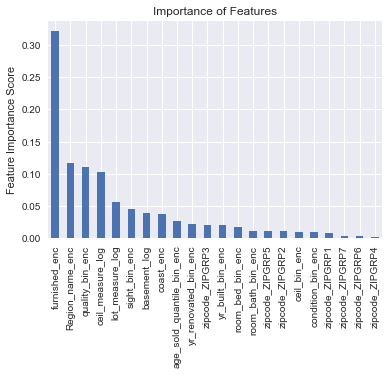

In [810]:
from sklearn.tree import DecisionTreeRegressor
predictors=list(X)
model = DecisionTreeRegressor()
model.fit(X, y)
feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [811]:
feat_imp

furnished_enc                0.321824
Region_name_enc              0.116006
quality_bin_enc              0.110430
ceil_measure_log             0.103172
lot_measure_log              0.055701
sight_bin_enc                0.045081
basement_log                 0.038872
coast_enc                    0.036987
age_sold_quantile_bin_enc    0.026405
yr_renovated_bin_enc         0.022038
zipcode_ZIPGRP3              0.020605
yr_built_bin_enc             0.020077
room_bed_bin_enc             0.017001
room_bath_bin_enc            0.010684
zipcode_ZIPGRP5              0.010629
zipcode_ZIPGRP2              0.010546
ceil_bin_enc                 0.009653
condition_bin_enc            0.008635
zipcode_ZIPGRP1              0.007698
zipcode_ZIPGRP7              0.003426
zipcode_ZIPGRP6              0.002548
zipcode_ZIPGRP4              0.001981
dtype: float64

<b>Findings:</b>
* Last 4 attribute has least significance, hence it can be removed.
* Pick the top 18 attributes for further processing

In [812]:
#Extract top 18 attributes and split the data Set
# Split X and y into training, validation and test sets. validation set will be used for Hyperparmeter finetuning.
imp_attributes = pd.DataFrame(feat_imp, columns=['attr']).reset_index()['index'] 
imp_attributes[0:18]

X = X[imp_attributes[0:18]]
backup = X

#X = X.apply(zscore)
transformer = RobustScaler().fit(X)
X = transformer.transform(X)

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=1)

# X_train, & y_train - It will have Training data
# X_test, & y_test - It will have Test data
# X_val, & y_val - It will have Validation data
print("Training Data size : "+ str(X_train.shape))
print("Validation Data size : "+ str(X_val.shape))
print("Testing Data size : "+ str(X_test.shape))

Training Data size : (12156, 18)
Validation Data size : (4053, 18)
Testing Data size : (5404, 18)


## 4. Modeling  (Week 4 - In Progress)

Till now we have completed Feature Engg and finalized the Features that will be used for further model building. As of part of Modeling we will evaluate various regression models and compare RMSE, Pearsonr & Test score for each model and finalize the best performing model.



In [813]:
# A generic function to execute model & calculate model score

#Function to execute the model with KFold Technique.
def executeModelWithKfold (model, X, y):
    
    num_folds = 10
    seed = 7
    kfold = KFold(n_splits=num_folds, random_state=seed)
    result = cross_val_score(model, X, y, cv=kfold)
    print('Score of model with Kfold: {:.2f}'.format(result.mean()))
    return str(round(result.mean(),2)), result

#Function RSME of predicted and target values
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def comparePredActual(y_test, y_pred):
    
    corrWithResult = str(round(pearsonr(y_pred, y_test)[0],2))
    
    sn.set(color_codes=True)
    with sn.axes_style("darkgrid"):
        sn.jointplot(x=y_test, y=y_pred, kind="reg", color="b").set_axis_labels("Actual Price", "Predicted Price")
        plt.show()
    print('pearsonr : {}'.format(corrWithResult))
    return corrWithResult

#Generic function to execute model and publish results
def executeModel(model, X_train, X_test, y_train, y_test, X, y, model_name, results ):
    
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    pearsoncorr = comparePredActual(y_test, y_predict)
    #r2 = round(r2_score(y_test, y_predict),2)
    #adjR2 = 1 - float(len(y_predict)-1)/(len(y_predict)-len(model.coef_)-1)*(1 - metrics.r2_score(y_test,y_predict))
    #adjR2 = round(adjR2,2)
    model_score_train = str(round(model.score(X_train, y_train),2))
    model_score_test = str(round(model.score(X_test, y_test),2))
    rmse_val = str(round(rmse(y_predict, y_test), 3))
    print('RMSE : {}'.format(rmse_val))
   
    #kfold_score, tResult =   executeModelWithKfold(model, X, y)
    
    results = results.append({'Model': model_name, \
                        'Train Score': model_score_train, \
                        'Test Score': model_score_test, \
                        #"Kfold Test Score": kfold_score, \
                        "pearsonr": pearsoncorr, \
                        "RMSE": rmse_val
                        #"R2": r2,\
                        #"Adjusted R2":   adjR2   
                        },ignore_index=True)
    results = results[['Model', 'Train Score', 'Test Score', 'RMSE', 'pearsonr']]
    
    return results


    

### 4.1 Linear Regression

Test the model with Simple Linear Regression

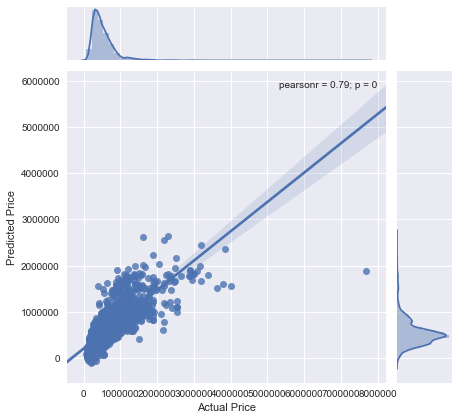

pearsonr : 0.79
RMSE : 220663.3


,Model,Train Score,Test Score,RMSE,pearsonr
0,Linear Regression,0.63,0.63,220663.3,0.79


In [814]:
regression_model = LinearRegression()
# Execute the model
results = pd.DataFrame()
results = executeModel (regression_model, X_train, X_test, y_train, y_test, X, y, "Linear Regression", results)
results

<b>Findings:</b>
* Model score is 0.63 and pearsonr is 0.79. 
* Train and test score are almost same, so model is generalizing well.
* Need to compare with other models.

### 4.2. Polynomial model (quadratic)

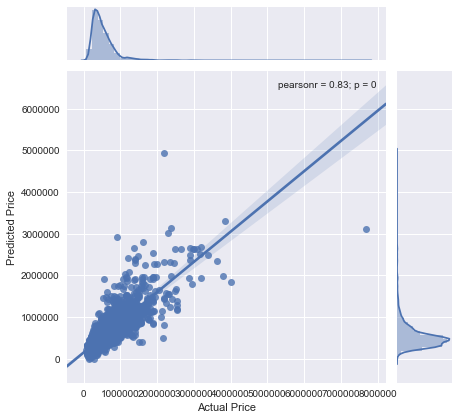

pearsonr : 0.83
RMSE : 202246.711


,Model,Train Score,Test Score,RMSE,pearsonr
0,Linear Regression,0.63,0.63,220663.3,0.79
1,Polynomial model,0.73,0.69,202246.711,0.83


In [815]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


poly_model = PolynomialFeatures(degree=2, interaction_only=True, include_bias=True)
X_train_ = poly_model.fit_transform(X_train)
X_test_ = poly_model.fit_transform(X_test)
poly_clf = linear_model.LinearRegression()

results = executeModel (poly_clf, X_train_, X_test_, y_train, y_test, X, y, "Polynomial model", results)
results

<b>Findings:</b>
* Model has performed well when compared to linear regression.
* Test score has improved to 0.69

### 4.3. Decision Tree Regressor

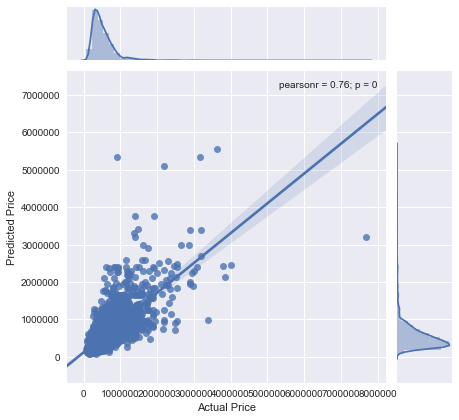

pearsonr : 0.76
RMSE : 259743.754


,Model,Train Score,Test Score,RMSE,pearsonr
0,Linear Regression,0.63,0.63,220663.3,0.79
1,Polynomial model,0.73,0.69,202246.711,0.83
2,Decision Tree Regressor,1.0,0.48,259743.754,0.76


In [816]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
results = executeModel (dtr_model, X_train, X_test, y_train, y_test, X, y, "Decision Tree Regressor", results)
results

<b>Findings:</b>
* Model is performing bad compared to previous 2 models.
* Highly overfitted, RMSE has increased and perasonr decreased, which is bad
* We can ignore this model.

### 4.4. Decision Tree Regressor with regularization

Let us do some reqularization to address overfitment.

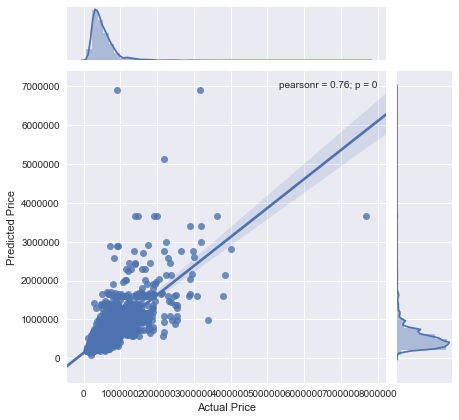

pearsonr : 0.76
RMSE : 244475.561


,Model,Train Score,Test Score,RMSE,pearsonr
0,Linear Regression,0.63,0.63,220663.3,0.79
1,Polynomial model,0.73,0.69,202246.711,0.83
2,Decision Tree Regressor,1.0,0.48,259743.754,0.76
3,Decision Tree Regressor with regularization,0.84,0.54,244475.561,0.76


In [817]:
dtr_model_regularization = DecisionTreeRegressor(max_depth = 10,random_state=1)

results = executeModel (dtr_model_regularization, X_train, X_test, y_train, y_test, X, y, "Decision Tree Regressor with regularization", results)
results

<b>Findings:</b>
* Model test score is 0.61. 
* But model is bit overfitted as train score is 0.84


### 4.7. Gradient Boosting Regressor 

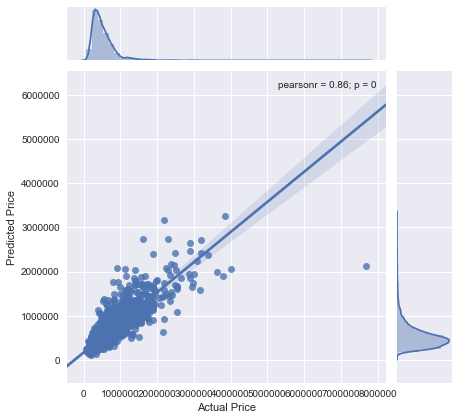

pearsonr : 0.86
RMSE : 183553.179


,Model,Train Score,Test Score,RMSE,pearsonr
0,Linear Regression,0.63,0.63,220663.3,0.79
1,Polynomial model,0.73,0.69,202246.711,0.83
2,Decision Tree Regressor,1.0,0.48,259743.754,0.76
3,Decision Tree Regressor with regularization,0.84,0.54,244475.561,0.76
4,Gradient Boosting Regressor,0.77,0.74,183553.179,0.86


In [818]:
GBR_model=GradientBoostingRegressor(random_state=1, max_depth=3,  n_estimators=100, \
                                    learning_rate=0.3, loss="huber", min_samples_leaf=2)
results = executeModel (GBR_model, X_train, X_test, y_train, y_test, X, y, "Gradient Boosting Regressor", results)
results

<b>Findings:</b>
* Model test score is 0.74. <b>Best of all 5 models</b>
* Model is generalizing very well with train score 0.77
* RMSE is lowest of all which is good.
* pearsonr is highest 0.86, which is good.

### 4.8. Ada Boost Regressor 

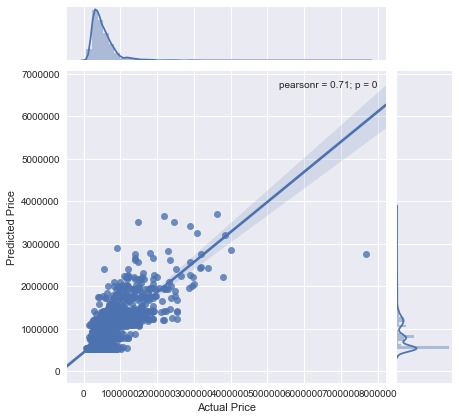

pearsonr : 0.71
RMSE : 397454.774


,Model,Train Score,Test Score,RMSE,pearsonr
0,Linear Regression,0.63,0.63,220663.3,0.79
1,Polynomial model,0.73,0.69,202246.711,0.83
2,Decision Tree Regressor,1.0,0.48,259743.754,0.76
3,Decision Tree Regressor with regularization,0.84,0.54,244475.561,0.76
4,Gradient Boosting Regressor,0.77,0.74,183553.179,0.86
5,Ada Boost Regressor,-0.13,-0.21,397454.774,0.71


In [819]:
adaBR_model=AdaBoostRegressor()
results = executeModel (adaBR_model, X_train, X_test, y_train, y_test, X, y, "Ada Boost Regressor", results)
results

<b>Findings:</b>
* Worst performing model.

### 4.9. Random Forest Regressor

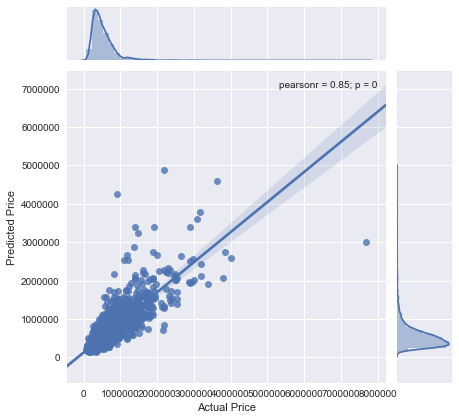

pearsonr : 0.85
RMSE : 194787.813


,Model,Train Score,Test Score,RMSE,pearsonr
0,Linear Regression,0.63,0.63,220663.3,0.79
1,Polynomial model,0.73,0.69,202246.711,0.83
2,Decision Tree Regressor,1.0,0.48,259743.754,0.76
3,Decision Tree Regressor with regularization,0.84,0.54,244475.561,0.76
4,Gradient Boosting Regressor,0.77,0.74,183553.179,0.86
5,Ada Boost Regressor,-0.13,-0.21,397454.774,0.71
6,Random Forest Regressor,0.96,0.71,194787.813,0.85


In [820]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(n_estimators = 50, random_state=10)
results = executeModel (rfcl, X_train, X_test, y_train, y_test, X, y, "Random Forest Regressor", results)
results

<b>Findings:</b>
* Model test score is 0.71. 
* Model is highly overfitted.
* RMSE  has increased, which is not good
* <b>Overall Gradient Boosting Regressor is best model till now

### 4.10. XGB Regressor

[18:32:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


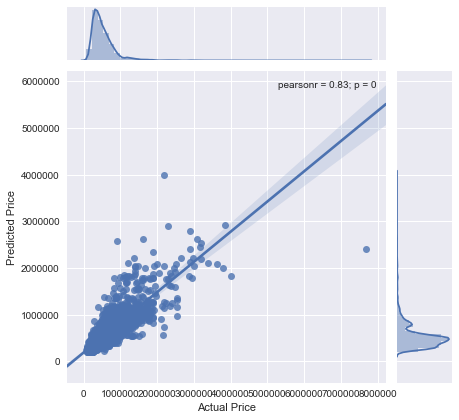

pearsonr : 0.83
RMSE : 200718.644


,Model,Train Score,Test Score,RMSE,pearsonr
0,Linear Regression,0.63,0.63,220663.3,0.79
1,Polynomial model,0.73,0.69,202246.711,0.83
2,Decision Tree Regressor,1.0,0.48,259743.754,0.76
3,Decision Tree Regressor with regularization,0.84,0.54,244475.561,0.76
4,Gradient Boosting Regressor,0.77,0.74,183553.179,0.86
5,Ada Boost Regressor,-0.13,-0.21,397454.774,0.71
6,Random Forest Regressor,0.96,0.71,194787.813,0.85
7,XGB Regressor,0.73,0.69,200718.644,0.83


In [821]:
from xgboost import XGBRegressor
xgbReg = XGBRegressor(n_estimators = 50, random_state=10)

results = executeModel (xgbReg, X_train, X_test, y_train, y_test, X, y, "XGB Regressor", results)
results

<b>Findings:</b>
* Model test score is .69. 
* Model is generalizing very well.
* RMSE is has increased, which is not good
* pearsonr is decreased to 0.83, which is not good.
* <b>Overall Gradient Boosting Regressor is best model till now

### 4.11 Principal Component Analysis

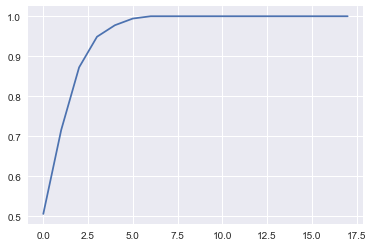

In [822]:
from sklearn.decomposition import PCA
#scaler = StandardScaler()
#scaler = RobustScaler()
#scaled_df = scaler.fit_transform(X)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))


<b>Findings:</b> 

* The above scree plot shows that first 5 Principle components has maximum information. i.e. from 18 features, it can be can reduced to 5 PCs without losing major information.

In [823]:
pca = PCA(n_components=5)

# Create a dataframe with 8 PC.
pca_df = pd.DataFrame(data = pca.fit_transform(X),
        columns = ['PC1','PC2','PC3','PC4','PC5'])

X_trainval1, X_test1, y_trainval1, y_test1 = train_test_split(pca_df, y, test_size=0.25, random_state=1)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_trainval1, y_trainval1, test_size=0.25, random_state=1)

# X_train, & y_train - It will have Training data
# X_test, & y_test - It will have Test data
# X_val, & y_val - It will have Validation data
print("Training Data size : "+ str(X_train1.shape))
print("Validation Data size : "+ str(X_val1.shape))
print("Testing Data size : "+ str(X_test1.shape))

Training Data size : (12156, 5)
Validation Data size : (4053, 5)
Testing Data size : (5404, 5)


### 4.12 Test the GradientBoostingRegressor model with PCA (reduced features)

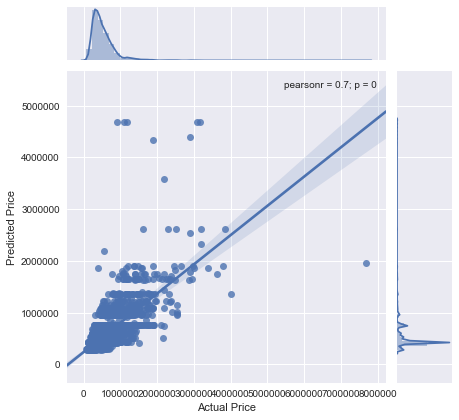

pearsonr : 0.7
RMSE : 262158.88


,Model,Train Score,Test Score,RMSE,pearsonr
0,Linear Regression,0.63,0.63,220663.3,0.79
1,Polynomial model,0.73,0.69,202246.711,0.83
2,Decision Tree Regressor,1.0,0.48,259743.754,0.76
3,Decision Tree Regressor with regularization,0.84,0.54,244475.561,0.76
4,Gradient Boosting Regressor,0.77,0.74,183553.179,0.86
5,Ada Boost Regressor,-0.13,-0.21,397454.774,0.71
6,Random Forest Regressor,0.96,0.71,194787.813,0.85
7,XGB Regressor,0.73,0.69,200718.644,0.83
8,Gradient Boosting Regressor with PCA,0.6,0.47,262158.88,0.7


In [824]:
GBR_model=GradientBoostingRegressor()

results = executeModel (GBR_model, X_train1, X_test1, y_train1, y_test1, X, y, "Gradient Boosting Regressor with PCA", results)
results

<b>Findings:</b>
* Gradient boosting with PCA is not performning well.
* <b>Overall Gradient Boosting Regressor is best model till now

### 5. Model Fine tunning 

* Gradient Boosting Regressor is best performing model till now. 
* Let us fine tune the selected model further.

### 5.1 Find the optimal hyperparameter with GridSearchCV for Gradient Boosting Regressor

In [825]:
# Perform gridsearchCV on validation dataset
GBR_model=GradientBoostingRegressor()

param_test = {'max_depth':range(3,5,7), 'learning_rate':[0.1, 0.2, 0.3], \
              'n_estimators':[5,7,100], 'loss':['ls', 'lad', 'huber', 'quantile'],\
             'min_samples_leaf':[2,3,4,5]}
randomCV = GridSearchCV(GBR_model,param_grid=param_test) 

randomCV.fit(X_val, y_val)

print(randomCV.best_params_)

{'learning_rate': 0.2, 'loss': 'ls', 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 100}


<b>Findings:</b>
    
* After doing a GridSearchCV on GradientBoostingRegressor with validation dataset, we find that <b>{'learning_rate': 0.2, 'loss': 'ls', 'max_depth': 3, 'min_samples_leaf': 5, 'n_estimators': 100} </b>is the ideal parameters for the model.
* Next let us run the GradientBoostingRegressor with tuned hyperparameters.

Score of model with Kfold: 0.74


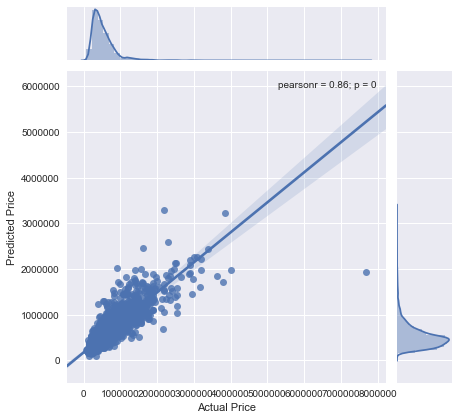

pearsonr : 0.86
RMSE : 187975.1


,Model,Train Score,Test Score,RMSE,pearsonr
0,Gradient Boosting Regressor with Tuned Hyperpa...,0.75,0.73,187975.1,0.86


In [826]:
GBR_model_Tuned=GradientBoostingRegressor(max_depth=3,  n_estimators=100, learning_rate=0.2, loss='huber', min_samples_leaf= 4)
results_tuned = pd.DataFrame()
result_Scores = executeModelWithKfold (GBR_model_Tuned, X, y)
results_tuned = executeModel (GBR_model_Tuned, X_train, X_test, y_train, y_test, X, y, "Gradient Boosting Regressor with Tuned Hyperparameter", results_tuned)
results_tuned

<b>Findings:</b>
* Model test score is 0.73, which is best till now.
* Training score is 0.75, which is good and model is generalizing well.
* RMSE is better than  Gradient Boosting Regressor's RMSE.
* Pearsonr is better than Gradient Boosting Regressor's Pearsonr.
* <b>Overall Gradient Boosting Regressor with Tuned Hyperparameter is best model till now

### 5.2. Ensemble Techniques - Bagging Regressor

Let us use Ensemble techniques to reduce the bias errors.

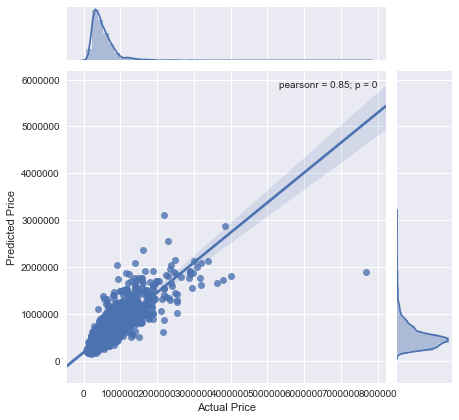

pearsonr : 0.85
RMSE : 192757.336


,Model,Train Score,Test Score,RMSE,pearsonr
0,Gradient Boosting Regressor with Tuned Hyperpa...,0.75,0.73,187975.1,0.86
1,BaggingRegressor with Gradient Boosting Regres...,0.73,0.71,192757.336,0.85


In [827]:
from sklearn.ensemble import BaggingRegressor

bgcl = BaggingRegressor(base_estimator=GBR_model_Tuned, n_estimators=5, random_state=10)
#bgcl = BaggingClassifier(n_estimators=50)
results_tuned = executeModel (bgcl, X_train, X_test, y_train, y_test, X, y, "BaggingRegressor with Gradient Boosting Regressor with Tuned Hyperparameter", results_tuned)
results_tuned

<b>Findings:</b>
* This is performing similar to Gradient Boosting Regressor with Tuned Hyperparameter 

### 5.3 Ensemble Techniques - AdaBoostRegressor

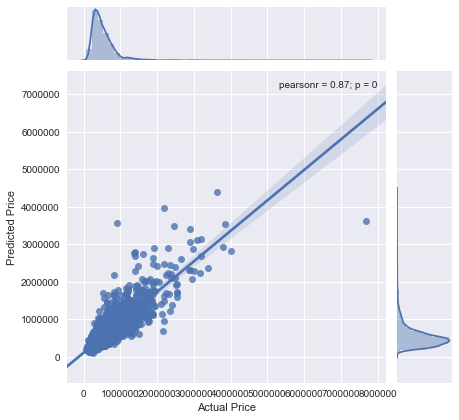

pearsonr : 0.87
RMSE : 180702.352


,Model,Train Score,Test Score,RMSE,pearsonr
0,Gradient Boosting Regressor with Tuned Hyperpa...,0.75,0.73,187975.1,0.86
1,BaggingRegressor with Gradient Boosting Regres...,0.73,0.71,192757.336,0.85
2,AdaBoostRegressor with Gradient Boosting Regre...,0.84,0.75,180702.352,0.87


In [828]:
from sklearn.ensemble import AdaBoostRegressor
abcl = AdaBoostRegressor(base_estimator=GBR_model_Tuned, n_estimators=5, random_state=10)
results_tuned = executeModel (abcl, X_train, X_test, y_train, y_test, X, y, "AdaBoostRegressor with Gradient Boosting Regressor with Tuned Hyperparameter", results_tuned)
results_tuned

<b>Findings:</b>
* There is no improvement 

### 5.4 Regularization with Ridge and Lasso Regression

Check if the models performance will be better with Ridge or Lasso 

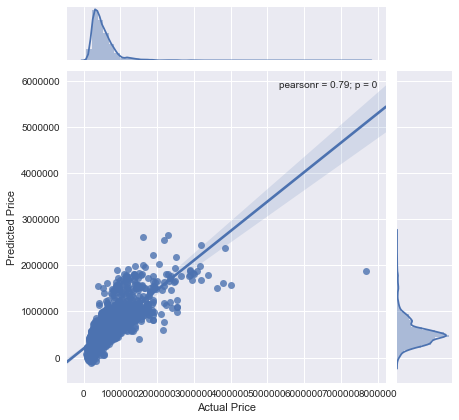

pearsonr : 0.79
RMSE : 220663.298


,Model,Train Score,Test Score,RMSE,pearsonr
0,Gradient Boosting Regressor with Tuned Hyperpa...,0.75,0.73,187975.1,0.86
1,BaggingRegressor with Gradient Boosting Regres...,0.73,0.71,192757.336,0.85
2,AdaBoostRegressor with Gradient Boosting Regre...,0.84,0.75,180702.352,0.87
3,Regularization with Ridge,0.63,0.63,220663.298,0.79


In [829]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01) 
results_tuned = executeModel (rr, X_train, X_test, y_train, y_test, X, y, "Regularization with Ridge", results_tuned)
results_tuned

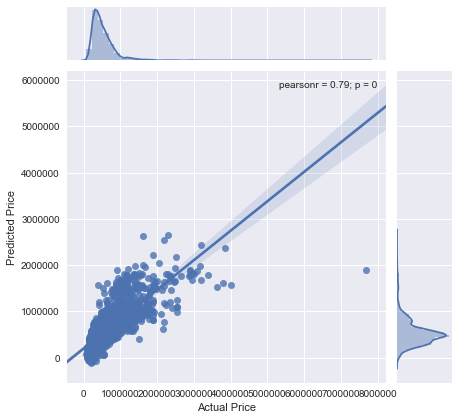

pearsonr : 0.79
RMSE : 220663.299


,Model,Train Score,Test Score,RMSE,pearsonr
0,Gradient Boosting Regressor with Tuned Hyperpa...,0.75,0.73,187975.1,0.86
1,BaggingRegressor with Gradient Boosting Regres...,0.73,0.71,192757.336,0.85
2,AdaBoostRegressor with Gradient Boosting Regre...,0.84,0.75,180702.352,0.87
3,Regularization with Ridge,0.63,0.63,220663.298,0.79
4,Regularization with Lasso,0.63,0.63,220663.299,0.79


In [830]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01) 
results_tuned = executeModel (lasso, X_train, X_test, y_train, y_test, X, y, "Regularization with Lasso", results_tuned)
results_tuned

<b>Findings:</b>
    
* Regularization with Lasso and Rigde is not improving the performance, but model is generalizing well.
* Lasso and Ridge may not be performing better because here were not handling a Linear Regression case.

### 5.5. Find the performance at 95% confidence interval.

Finally we can conclude that <b> Bagging regressor with Gradient Boosting Regressor Model (tuned hyperparameter)</b> has performed well. We will now find the performance range at 95% Confidence interval 

In [831]:
GBR_model_Tuned_final=GradientBoostingRegressor(max_depth=3,  n_estimators=100, learning_rate=0.2, loss='huber', min_samples_leaf= 4)

result_Scores = executeModelWithKfold (GBR_model_Tuned_final, X, y)

print ('All score of 50 runs \n'+ str(result_Scores[1]))

mean = result_Scores[1].mean()
std = result_Scores[1].std()
n = len(result_Scores[1])

lowerRange = mean - (1.96*std/np.sqrt(n))
upperRange = mean + (1.96*std/np.sqrt(n))

print('95% confidence interval {:.2f} and {:.2f}'.format(lowerRange*100, upperRange*100))


Score of model with Kfold: 0.74
All score of 50 runs 
[0.72174888 0.76331817 0.72914771 0.74825633 0.75727551 0.76499568
 0.7453344  0.68222825 0.73099049 0.71480966]
95% confidence interval 72.08 and 75.09


### 6. Conclusion

The selected model Bagging regressor with Gradient Boosting Regressor Model (tuned hyperparameter )  is giving <b> performance of range 72.09 and 75.09 @ 95% confidence interval. </b>

### Save Model.

In [865]:
import pickle
GBR_model_Tuned.fit(X,y)
# Saving model to disk
pickle.dump(GBR_model_Tuned, open('../model/HousePrediction.pkl','wb'))

In [866]:
model = pickle.load(open('../model/HousePrediction.pkl', 'rb'))

In [834]:
model.predict([list(X[0])])

array([943432.56350536])

### Work Area (Need to delete)

In [872]:
input = [5104530220, '20150420T000000', 3, 2.5, 2370, 4324, 2, 0, 0, 3, 8, 2370, 0, 2006, 0, 98038, 47.3515, -121.999, 2370, 4348, 0, 6694]
processedIP = [950717.0429508922, 549520.7714335974, 539917.7813990546, 8.013343181386672, 9.507329003748263, 496845.87706770794, 0.0, 531692.9824537972, 473017.5628321074, 530494.7598865009, 0.0, 465525.44911923935, 536045.4306467145, 847215.7873351735, 0.0, 443128.3573171922, 0.0, 608557.9988225052] 

In [873]:
model.predict([processedIP])

array([3089696.06894698])

In [869]:
processedIP1 = [437889.33546439884, 316865.4342938459, 539917.7813990546, 7.467942332285852, 8.922791623969637, 496845.87706770794, 6.68586094706836, 531692.9824537972, 545188.1631739872, 530494.7598865009, 0.0, 497280.6947873987, 785300.3249160923, 588592.9019780016, 0.0, 443128.3573171922, 0.0, 536125.6504229851]

In [871]:
model.predict([processedIP1])

array([3030969.98073223])

In [859]:
row = backup.iloc[0:1,:]
list(row.iloc[0])
model.predict([list(row.iloc[0])])

array([2961951.63118892])

In [838]:
backup.to_csv('../data/backup.csv')

In [839]:
row

,furnished_enc,Region_name_enc,quality_bin_enc,ceil_measure_log,lot_measure_log,sight_bin_enc,basement_log,coast_enc,age_sold_quantile_bin_enc,yr_renovated_bin_enc,zipcode_ZIPGRP3,yr_built_bin_enc,room_bed_bin_enc,room_bath_bin_enc,zipcode_ZIPGRP5,zipcode_ZIPGRP2,ceil_bin_enc,condition_bin_enc
0,950717.042951,549520.771434,539917.781399,8.013343,9.507329,496845.877068,0.0,531692.982454,465525.449119,530494.759887,0,473017.562832,536045.430647,847215.787335,0,0,443128.357317,608557.998823


950717.0429508922, 549520.7714335974, 539917.7813990545, 8.013343181386672, 9.507329003748263, 496845.877067708, 0.0, 531692.9824537972, 481418.5684766746, 530494.7598865009, 0.0, 473017.5628321074, 536039.2450838588, 968438.2102122095, 0.0, 0.0, 0.0, 443128.3573171922]

In [840]:
grpDF1 = pd.read_csv('../data/age_sold_quantile_bin.csv')
grpDF1.set_index("key", inplace = True) 
grpDF1.rename(columns = { 0:"val"}, inplace = True) 
#x1 = grpDF1.get_value('60', 'val') 
lookup = str(60)
x1 = grpDF1.at[lookup, 'val'] 
type(x1)
print (x1)

465525.44911923935


In [841]:
grpDF1

,val
key,
0,617503.901273
10,604235.781831
20,592625.980954
30,546807.199018
40,497280.694787
50,468265.045197
60,465525.449119
70,485127.842242
80,530914.625388


[950717.0429508922, 316865.4342938459, 539917.7813990546, 7.467942332285852, 8.922791623969637, 496845.87706770794, 6.68586094706836, 531692.9824537972, 545188.1631739872, 530494.7598865009, 0.0, 497280.6947873987, 536045.4306467145, 588592.9019780016, 0.0, 443128.3573171922, 0.0, 536125.6504229851]

[437889.33546439884, 316865.4342938459, 539917.7813990546, 7.467942332285852, 8.922791623969637, 496845.87706770794, 6.68586094706836, 531692.9824537972, 545188.1631739872, 530494.7598865009, 0.0, 497280.6947873987, 785300.3249160923, 588592.9019780016, 0.0, 443128.3573171922, 0.0, 536125.6504229851]